# American National Parks' Biodiversity Analysis and Recreation Visits Prediction Based on Species Counts

Yafei Ye, MRes Spatial Data Science and Visualisation, CASA, UCL

A few years ago, I watched a documentary called 'The National Parks: America's Best Idea'. I was moved to tears several times during watching as I realised there are so many people spending there whole lives in establishing and protecting National Parks and how beautiful and meaningful every living creature is to us! I felt so surprised and excited when I saw 'Biodiversity in National Parks' dataset is in this course' examples datasets and I chose it as my topic without any hesitation.

**The datasets used for this project are:**  
(1). 'species.csv' and 'parks.csv' downloaded from: https://www.kaggle.com/nationalparkservice/park-biodiversity. As this dataset was uploaded to kaggle in January 2017, I tried to find the newer one from the original source: https://irma.nps.gov/NPSpecies. However, I can only download the species list in every National Park one by one for I have to choose a park before searching data. After randomly choosing several parks to download the data and compare them with the dataset in Kaggle, I found they are totally the same. Now, I can make sure that the Kaggle one is the newest aggregation species dataset I can obtain.  
(2). '2018 NPS Statistical Abstract.pdf' downloaded from National Park Service Data Store: https://irma.nps.gov/DataStore/Reference/Profile/2259799 which contains the 2018 Recreation Visits and Non-Recreation Visits (including commuters, government personnel and tradespeople with business in the park) statistics. Unfortunately, it's a pdf file and I typed the data manually and combined it with 'park.csv'.

**Based on these data, this project's aims are:**  
(1). Exploring the biodiversity characteristics in every American National Parks deeply so that more visit suggestions can be given based on biodiversity;  
(2). Finding relationships between total species counts and recreation & non-recreation visits counts to verify whether the amount of total species influences the number of visits;  
(3). Building recreation visits prediction models based on different species categories data so that when building new national parks, the number of recreation visits can be predicted and more preparation can be made in advance.

## 1. Biodiversity Characteristic Analysis

This part will explore the species distribution characteristics in different American National Parks.

### 1.1 Data Reading

First of all, **read 'species.csv'** to explore the structure of the data. As we can see in `species.head(10)`, every row is attributes about creatures but not parks.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 300) # specifies number of rows to show
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
species = pd.read_csv('species.csv')
species.head(10)

,Species_ID,Park_Name,Category,Order,Family,Scientific_Name,Common_Names,Record_Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN
5,ACAD-1005,Acadia National Park,Mammal,Carnivora,Felidae,Lynx canadensis,Canada Lynx,Approved,Not Confirmed,Native,NaN,NaN,NaN
6,ACAD-1006,Acadia National Park,Mammal,Carnivora,Felidae,Lynx rufus,"Bay Lynx, Bobcat, Red Lynx, Wild Cat",Approved,Not Present (Historical Report),Not Native,NaN,Vagrant,NaN
7,ACAD-1007,Acadia National Park,Mammal,Carnivora,Mephitidae,Mephitis mephitis,"Eastern Skunk, Polecat, Striped Skunk",Approved,Not Present (Historical Report),Native,NaN,NaN,NaN
8,ACAD-1008,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,NaN
9,ACAD-1009,Acadia National Park,Mammal,Carnivora,Mustelidae,Martes pennanti,"Blackcat, Fisher, Pekan",Approved,Present,Native,Rare,NaN,NaN


The **`species.count()`** result shows that many records in 'Occurrence', 'Nativeness', 'Abundance', 'Seasonality' and 'Conservation_Status' are missing which means it's not reliable to analyse these attributes. We can discard these attributes in future analysis and utilize 'Category' attribute purely as 'Order' and 'Family' attributes are too detailed.

In [3]:
species.count()

Species_ID             119248
Park_Name              119248
Category               119248
Order                  117776
Family                 117736
Scientific_Name        119248
Common_Names           119248
Record_Status          119248
Occurrence              99106
Nativeness              94203
Abundance               76306
Seasonality             20157
Conservation_Status      4718
dtype: int64

The **`species.dtypes`** results also indicates that all attributes are strings which are difficult for statistical analysis.

In [4]:
species.dtypes

Species_ID             object
Park_Name              object
Category               object
Order                  object
Family                 object
Scientific_Name        object
Common_Names           object
Record_Status          object
Occurrence             object
Nativeness             object
Abundance              object
Seasonality            object
Conservation_Status    object
dtype: object

### 1.2. Total Species Count Extracting and Analysing

**Use `value_counts()` function** to calculate the total count of species in every national park and transfer it to DataFrame for future analysis convenience.

In [5]:
Total_Count = species.Park_Name.value_counts()
Total_Species_Count = pd.DataFrame({'Park_Name':Total_Count.index, 'Total_Count':Total_Count.values})
Total_Species_Count

,Park_Name,Total_Count
0,Great Smoky Mountains National Park,6623
1,Redwood National Park,6310
2,Shenandoah National Park,4655
3,Death Valley National Park,4439
4,Yellowstone National Park,3966
5,Crater Lake National Park,3760
6,North Cascades National Park,3363
7,Hawaii Volcanoes National Park,3298
8,Rocky Mountain National Park,3152
9,Great Basin National Park,2653


**Utilize `describe()` function** to display the basic statistics.

In [6]:
Total_Species_Count.describe()

,Total_Count
count,56.000000
mean,2129.428571
std,1202.955192
min,848.000000
25%,1380.000000
50%,1815.500000
75%,2365.500000
max,6623.000000


**Create a boxplot** to check whether there are outliers and the result expresses there are 5 outliers, especially 2 are far away from the 'Maximum' line (Q3 + 1.5 * IQR). 

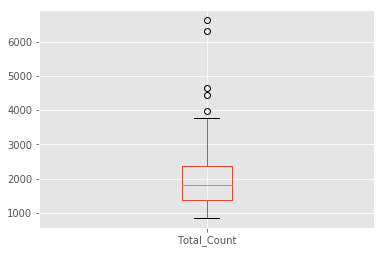

In [7]:
Total_Species_Count.boxplot()

**Draw a histogram to visualise** 

We can find that 'Great Smoky Mountains National Park' and 'Redwood National Park' are the 2 'big' outliers which have much more species records than other parks.

Text(0.5,0,'Park Name')

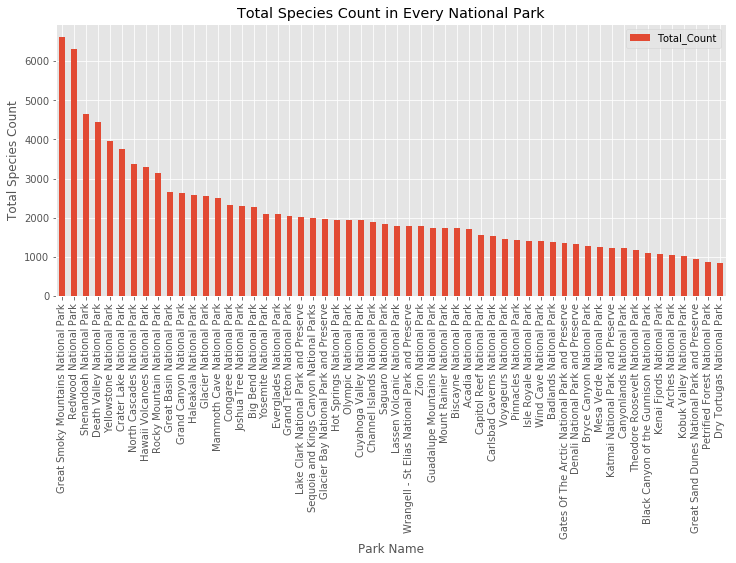

In [8]:
Total_Species_Count.plot.bar(x = 'Park_Name', figsize=(12, 5))
plt.title('Total Species Count in Every National Park')
plt.ylabel('Total Species Count')
plt.xlabel('Park Name')

### 1.3. Different Categories' Species Count Extracting and Analysing

**Employ `pivot_table()` function** to convert the original DataFrame into a pivot table which displays the counts of different categories of species in different parks.

In [9]:
Category_Count = species.pivot_table(index = 'Park_Name', columns = 'Category', aggfunc= 'size')
Category_Count

Category,Algae,Amphibian,Bird,Crab/Lobster/Shrimp,Fish,Fungi,Insect,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant
Park_Name,,,,,,,,,,,,,,
Acadia National Park,NaN,15.0,364.0,NaN,38.0,NaN,NaN,NaN,55.0,NaN,11.0,NaN,NaN,1226.0
Arches National Park,NaN,8.0,205.0,NaN,11.0,NaN,NaN,NaN,59.0,NaN,20.0,NaN,NaN,745.0
Badlands National Park,NaN,10.0,239.0,NaN,24.0,173.0,239.0,1.0,64.0,NaN,13.0,NaN,1.0,625.0
Big Bend National Park,NaN,13.0,415.0,NaN,53.0,NaN,NaN,NaN,89.0,48.0,62.0,NaN,NaN,1589.0
Biscayne National Park,NaN,8.0,233.0,NaN,818.0,NaN,11.0,34.0,28.0,NaN,40.0,NaN,NaN,554.0
Black Canyon of the Gunnison National Park,NaN,2.0,175.0,NaN,16.0,NaN,NaN,NaN,67.0,NaN,11.0,NaN,NaN,835.0
Bryce Canyon National Park,NaN,4.0,217.0,NaN,1.0,NaN,NaN,NaN,76.0,NaN,13.0,NaN,NaN,975.0
Canyonlands National Park,NaN,7.0,220.0,NaN,33.0,NaN,NaN,NaN,76.0,NaN,22.0,NaN,NaN,865.0
Capitol Reef National Park,NaN,6.0,248.0,NaN,15.0,NaN,NaN,NaN,73.0,NaN,21.0,NaN,NaN,1203.0


**Make a heatmap to show the species distribution. **

It's weird that many parks have no 'Insect' or 'Nonvascular Plant' records (the light grey cells mean the size values are 'NaN') at all while all parks have 'Vascular Plant'. It's like common sense for us that where there are advanced plants, there should be some lower plants and insects. It's also so strange that many parks possess 'Fish' whilst 'Algae' do not exist. We can infer that this csv file may omit some species. 

At the same time, many clues confirm that this data can still represent the biodiversity trendency somehow, for examples:  
(1). As most parks are most diverse in 'Vascular Plant', there are some parks make up with more 'Fish' and 'Bird' species than 'Vascular Plant', such as 'Dry Tortugas National Park' and 'Biscayne National Park'. Through literature review, we can discover that ['Dry Tortugas National Park'](https://www.nps.gov/drto/index.htm) is a small island mixed with cultural and natural landscapes, and ['Biscayne National Park'](https://www.nps.gov/bisc/index.htm) preserves the Biscayne Bay and its offshore barrier reefs, which perfectly explains why they consists of more fish and bird species than vascular plant;  
(2). Some parks are poor in any kinds of species categories, such as ['Kobuk Valley National Park'](https://en.wikipedia.org/wiki/Kobuk_Valley_National_Park), ['Badlands National park'](https://en.wikipedia.org/wiki/Badlands_National_Park#Fossil_hunters) and ['Petrified Forest National Park'](https://en.wikipedia.org/wiki/Petrified_Forest_National_Park). As Kobuk Valley National Park is a broad wetlands and the other two are full of petrified wood and animals and badlands as their name suggests, it's no wonder why less species of creatures live there.

Many interesting things also present in this heatmap:  
(1). 'Shenandoah National Park' has the biggest 'Vascular Plant' species amount;  
(2). The most diverse insects are living in 'Great Smoky Mountains National Parks';  
(3). 'Redwood National Park' possesses widest variety of 'Fungi'.  

It can be a useful guide for us when choosing parks to visit.

Text(0.5,1,'National Parks Species Distribution Heatmap')

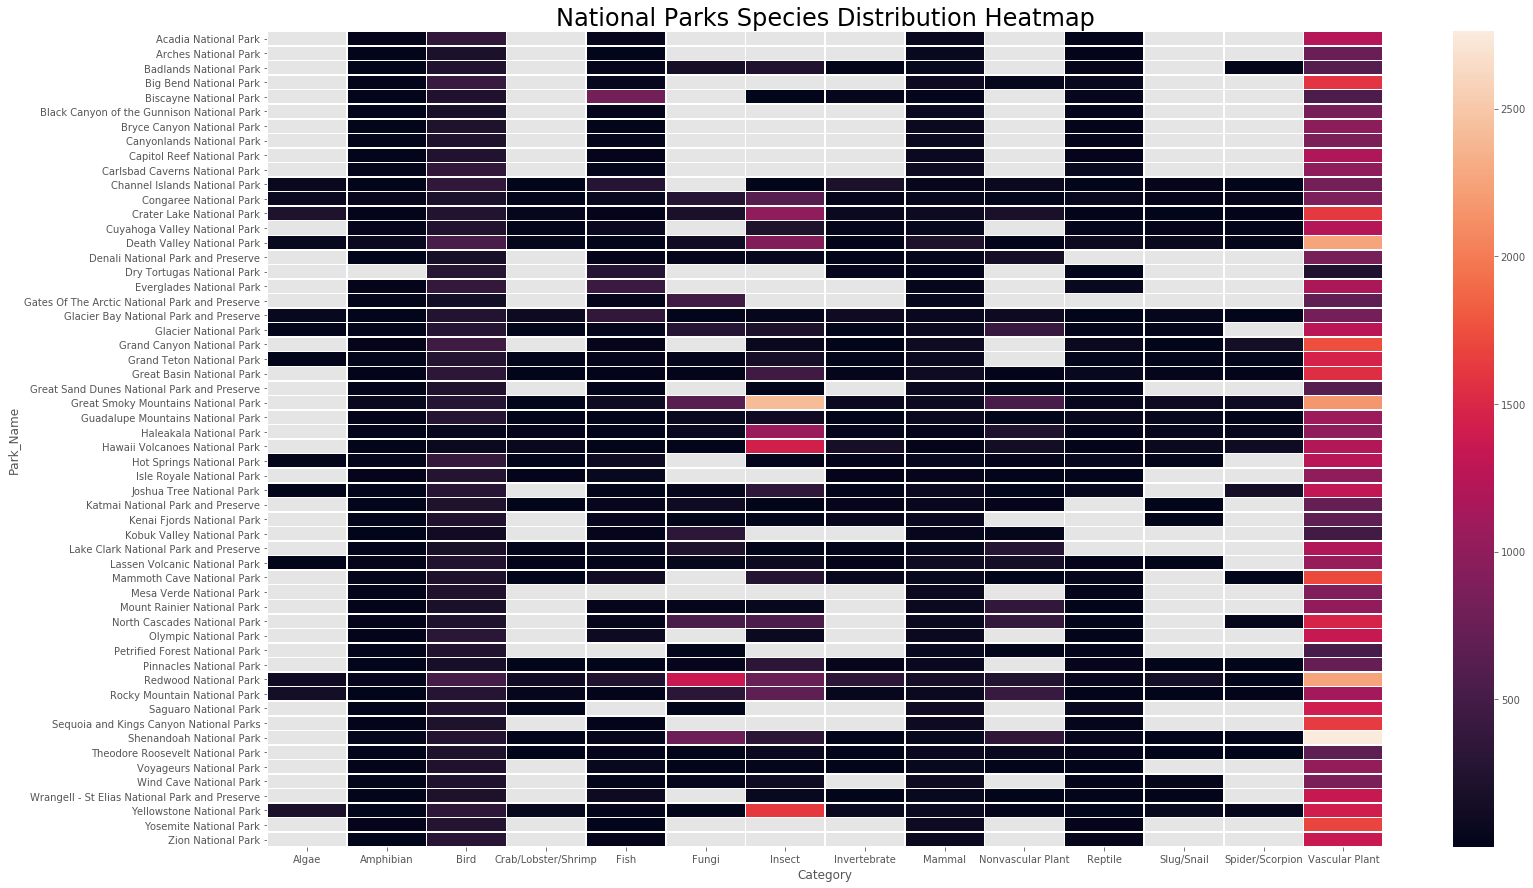

In [10]:
import seaborn as sns

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(Category_Count, linewidths=.5, ax=ax)
plt.title('National Parks Species Distribution Heatmap', fontsize = 24)

**Flatten the pivot table into DataFrame and replace all 'NaN' with 0** for the convenience of future analysis.

In [11]:
flattened = pd.DataFrame(Category_Count.to_records())
flattened = flattened.fillna(0)
flattened

,Park_Name,Algae,Amphibian,Bird,Crab/Lobster/Shrimp,Fish,Fungi,Insect,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant
0,Acadia National Park,0.0,15.0,364.0,0.0,38.0,0.0,0.0,0.0,55.0,0.0,11.0,0.0,0.0,1226.0
1,Arches National Park,0.0,8.0,205.0,0.0,11.0,0.0,0.0,0.0,59.0,0.0,20.0,0.0,0.0,745.0
2,Badlands National Park,0.0,10.0,239.0,0.0,24.0,173.0,239.0,1.0,64.0,0.0,13.0,0.0,1.0,625.0
3,Big Bend National Park,0.0,13.0,415.0,0.0,53.0,0.0,0.0,0.0,89.0,48.0,62.0,0.0,0.0,1589.0
4,Biscayne National Park,0.0,8.0,233.0,0.0,818.0,0.0,11.0,34.0,28.0,0.0,40.0,0.0,0.0,554.0
5,Black Canyon of the Gunnison National Park,0.0,2.0,175.0,0.0,16.0,0.0,0.0,0.0,67.0,0.0,11.0,0.0,0.0,835.0
6,Bryce Canyon National Park,0.0,4.0,217.0,0.0,1.0,0.0,0.0,0.0,76.0,0.0,13.0,0.0,0.0,975.0
7,Canyonlands National Park,0.0,7.0,220.0,0.0,33.0,0.0,0.0,0.0,76.0,0.0,22.0,0.0,0.0,865.0
8,Capitol Reef National Park,0.0,6.0,248.0,0.0,15.0,0.0,0.0,0.0,73.0,0.0,21.0,0.0,0.0,1203.0
9,Carlsbad Caverns National Park,0.0,15.0,367.0,0.0,5.0,0.0,0.0,0.0,92.0,0.0,62.0,0.0,0.0,995.0


**Convert current float data type into integer.**

In [12]:
cols = flattened.columns.drop('Park_Name')
flattened[cols] = flattened[cols].astype('int')
flattened.dtypes

Park_Name              object
Algae                   int64
Amphibian               int64
Bird                    int64
Crab/Lobster/Shrimp     int64
Fish                    int64
Fungi                   int64
Insect                  int64
Invertebrate            int64
Mammal                  int64
Nonvascular Plant       int64
Reptile                 int64
Slug/Snail              int64
Spider/Scorpion         int64
Vascular Plant          int64
dtype: object

**Reorder the sequence of columns** based on the evolutionary level from high to low to make it more understandable for users

In [13]:
cols = flattened.columns.tolist()
cols = ['Park_Name', 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Crab/Lobster/Shrimp', 'Spider/Scorpion', 'Insect', 'Slug/Snail', 'Invertebrate', 'Vascular Plant', 'Nonvascular Plant', 'Fungi', 'Algae']
flattened = flattened[cols]
flattened

,Park_Name,Mammal,Bird,Reptile,Amphibian,Fish,Crab/Lobster/Shrimp,Spider/Scorpion,Insect,Slug/Snail,Invertebrate,Vascular Plant,Nonvascular Plant,Fungi,Algae
0,Acadia National Park,55,364,11,15,38,0,0,0,0,0,1226,0,0,0
1,Arches National Park,59,205,20,8,11,0,0,0,0,0,745,0,0,0
2,Badlands National Park,64,239,13,10,24,0,1,239,0,1,625,0,173,0
3,Big Bend National Park,89,415,62,13,53,0,0,0,0,0,1589,48,0,0
4,Biscayne National Park,28,233,40,8,818,0,0,11,0,34,554,0,0,0
5,Black Canyon of the Gunnison National Park,67,175,11,2,16,0,0,0,0,0,835,0,0,0
6,Bryce Canyon National Park,76,217,13,4,1,0,0,0,0,0,975,0,0,0
7,Canyonlands National Park,76,220,22,7,33,0,0,0,0,0,865,0,0,0
8,Capitol Reef National Park,73,248,21,6,15,0,0,0,0,0,1203,0,0,0
9,Carlsbad Caverns National Park,92,367,62,15,5,0,0,0,0,0,995,0,0,0


**Plot the Stacked Bar Graph** on National Parks Species so that we can see the amount of different categories of species in different parks more clearly.

Text(0.5,0,'Park Name')

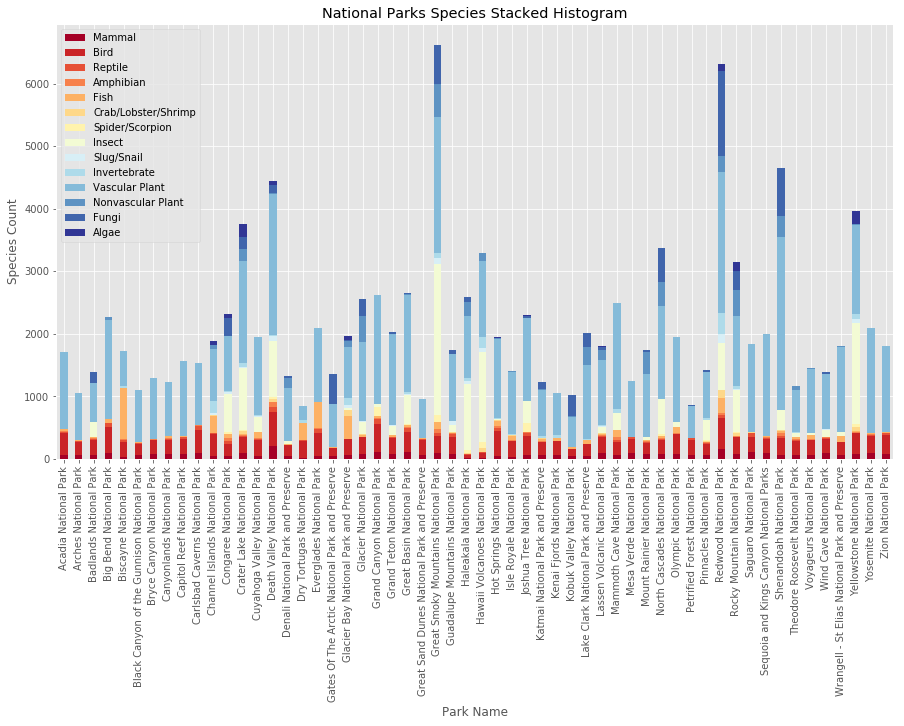

In [14]:
flattened.plot.bar(x = 'Park_Name', stacked=True, figsize=(15, 8), color = plt.cm.RdYlBu(np.linspace(0, 1, 14)))
plt.title('National Parks Species Stacked Histogram')
plt.ylabel('Species Count')
plt.xlabel('Park Name')
# Colormaps_reference: https://matplotlib.org/examples/color/colormaps_reference.html
# How to make beautiful stacked bar graph: https://matplotlib.org/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py

**Merge the Category DataFrame with the Total Count DataFrame**

In [15]:
All_Count = pd.merge(flattened, Total_Species_Count, on='Park_Name')
All_Count

,Park_Name,Mammal,Bird,Reptile,Amphibian,Fish,Crab/Lobster/Shrimp,Spider/Scorpion,Insect,Slug/Snail,Invertebrate,Vascular Plant,Nonvascular Plant,Fungi,Algae,Total_Count
0,Acadia National Park,55,364,11,15,38,0,0,0,0,0,1226,0,0,0,1709
1,Arches National Park,59,205,20,8,11,0,0,0,0,0,745,0,0,0,1048
2,Badlands National Park,64,239,13,10,24,0,1,239,0,1,625,0,173,0,1389
3,Big Bend National Park,89,415,62,13,53,0,0,0,0,0,1589,48,0,0,2269
4,Biscayne National Park,28,233,40,8,818,0,0,11,0,34,554,0,0,0,1726
5,Black Canyon of the Gunnison National Park,67,175,11,2,16,0,0,0,0,0,835,0,0,0,1106
6,Bryce Canyon National Park,76,217,13,4,1,0,0,0,0,0,975,0,0,0,1286
7,Canyonlands National Park,76,220,22,7,33,0,0,0,0,0,865,0,0,0,1223
8,Capitol Reef National Park,73,248,21,6,15,0,0,0,0,0,1203,0,0,0,1566
9,Carlsbad Caverns National Park,92,367,62,15,5,0,0,0,0,0,995,0,0,0,1536


**Draw Scatter Graphs for Each Pair of Attributes and Distribution Charts for Each Individual Attributes**

From the distribution charts, we can see only 'Mammal', 'Bird', 'Vascular Plant' are normal distribution to a certain extent. Other attributes are biased seriously as most values are in a low degree. The scatter graphs also show the same problem. This may result from the deficiency of data as we talked in heatmap part. 

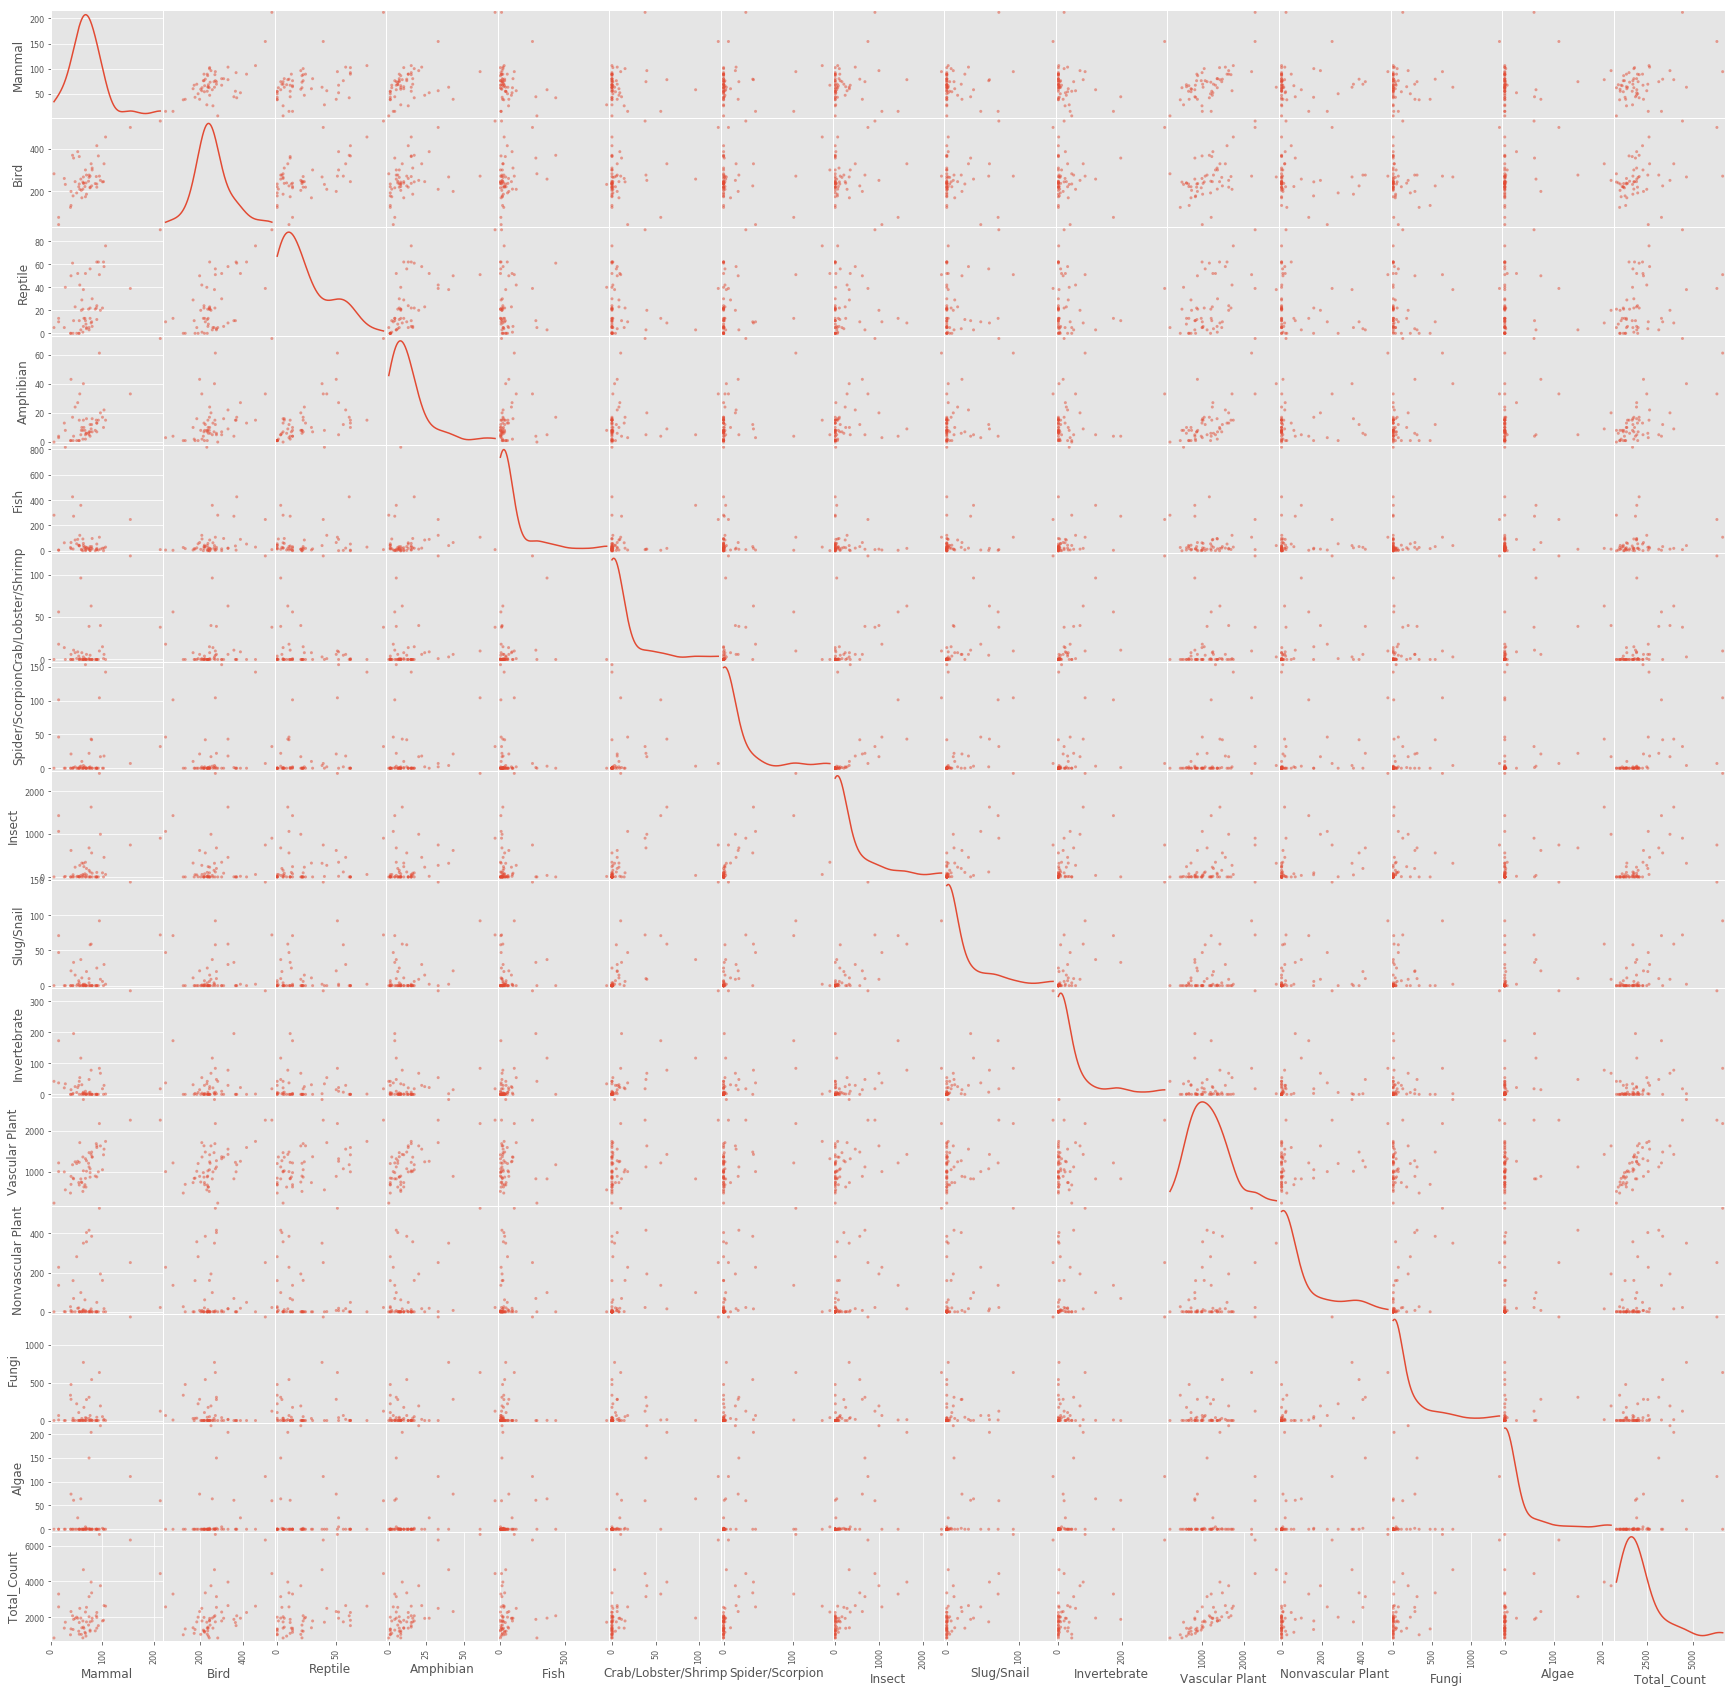

In [16]:
output = pd.plotting.scatter_matrix(All_Count, alpha=0.5, figsize=(30, 30), diagonal='kde')

**Extract the Correlation Matrix and Unstack It from High to Low**

The result indicates that:  
(1). The total species count has highest correlation with the vascular plant species count and the insect species count ranks No.2. It may because these two categories has higher species amount than other categories;
(2). 'Invertebrate', 'Crab/Lobster/Shrimp', 'Sluq/Snail' and 'insect' are in high correlations with each other as the latter 3 are belonging to invertebrate (I assume that these three categories recorded seperately from invertebrate is because they are more numerous and familiar to us). It makes sense that in the same environment, similar species live togather. It can explain why 'Mammal' and 'Bird', 'Amphibian' and 'Reptile' have high correlations as well;  
(3). 'Vascular Plant' and many animal categories have high correlations and 'Algae' and 'Crab/Lobster/Shrimp' is the same, which reflect the importance of living environment and food for animals.

This result reflects the nature rules which also proves the reliability of the data from the side. It provides a useful tip for us as well that if we want to see more species, we just go to somewhere has forests.

In [17]:
corr = All_Count.corr()
corr

,Mammal,Bird,Reptile,Amphibian,Fish,Crab/Lobster/Shrimp,Spider/Scorpion,Insect,Slug/Snail,Invertebrate,Vascular Plant,Nonvascular Plant,Fungi,Algae,Total_Count
Mammal,1.000000,0.643479,0.517658,0.548233,-0.242503,0.284378,0.098227,0.185868,0.383692,0.109692,0.599392,0.080480,0.270543,0.256475,0.475327
Bird,0.643479,1.000000,0.600363,0.470597,0.171470,0.264313,0.106484,0.007236,0.286836,0.230004,0.485568,-0.076381,0.165872,0.264282,0.388337
Reptile,0.517658,0.600363,1.000000,0.630603,0.094950,0.000114,0.342737,0.162001,0.233406,-0.009814,0.494969,-0.134604,0.048200,-0.015194,0.368097
Amphibian,0.548233,0.470597,0.630603,1.000000,0.017783,0.195669,0.195009,0.494428,0.457418,0.157328,0.679724,0.247097,0.390859,0.173688,0.685467
Fish,-0.242503,0.171470,0.094950,0.017783,1.000000,0.194078,-0.120386,-0.085335,0.099100,0.321854,-0.132485,-0.042678,0.050795,0.040180,0.058923
Crab/Lobster/Shrimp,0.284378,0.264313,0.000114,0.195669,0.194078,1.000000,0.146198,0.464011,0.750853,0.805878,0.280945,0.257589,0.453085,0.653318,0.573410
Spider/Scorpion,0.098227,0.106484,0.342737,0.195009,-0.120386,0.146198,1.000000,0.562465,0.304781,0.170320,0.312328,0.217982,0.102545,0.085427,0.448044
Insect,0.185868,0.007236,0.162001,0.494428,-0.085335,0.464011,0.562465,1.000000,0.692430,0.429592,0.441089,0.506998,0.386860,0.474810,0.791667
Slug/Snail,0.383692,0.286836,0.233406,0.457418,0.099100,0.750853,0.304781,0.692430,1.000000,0.774319,0.414233,0.336862,0.559439,0.385544,0.741768
Invertebrate,0.109692,0.230004,-0.009814,0.157328,0.321854,0.805878,0.170320,0.429592,0.774319,1.000000,0.222311,0.251221,0.500703,0.462149,0.550640


In [18]:
corr.unstack().sort_values(ascending = False).drop_duplicates()

Total_Count          Total_Count            1.000000
                     Vascular Plant         0.813616
Invertebrate         Crab/Lobster/Shrimp    0.805878
Insect               Total_Count            0.791667
Invertebrate         Slug/Snail             0.774319
Slug/Snail           Crab/Lobster/Shrimp    0.750853
                     Total_Count            0.741768
Fungi                Total_Count            0.700775
Slug/Snail           Insect                 0.692430
Total_Count          Amphibian              0.685467
Amphibian            Vascular Plant         0.679724
Algae                Crab/Lobster/Shrimp    0.653318
Bird                 Mammal                 0.643479
Reptile              Amphibian              0.630603
Nonvascular Plant    Total_Count            0.617919
Reptile              Bird                   0.600363
Mammal               Vascular Plant         0.599392
Nonvascular Plant    Fungi                  0.597210
Crab/Lobster/Shrimp  Total_Count            0.

**Visualise the Correlation Matrix** so that we can see it more clearly.

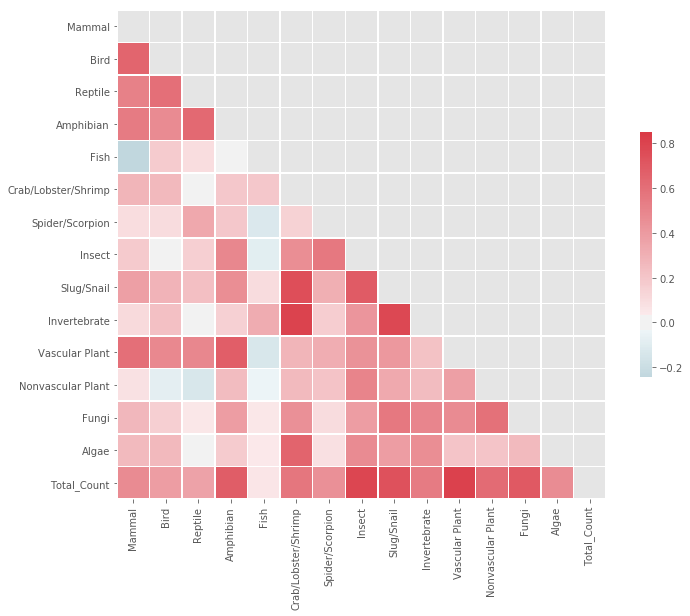

In [19]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.85, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# How to creat beautiful correlation graph: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

## 2. Total Species Count and Visits Count Relationship Analysis

This part will explore the relationships between total species count and recreation and non-recreation visits.

### **2.1. Data Preparation**

**Read parks.csv**

In [20]:
parks = pd.read_csv('parks.csv')
parks

,Park_Code,Park_Name,State,Acres,Latitude,Longitude,RecVisits,NonRecVisits
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,3537575,47100
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,1663557,492238
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,1008942,105109
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,440091,2364
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,469253,0
5,BLCA,Black Canyon of the Gunnison National Park,CO,32950,38.57,-107.72,308962,0
6,BRCA,Bryce Canyon National Park,UT,35835,37.57,-112.18,2679478,419953
7,CANY,Canyonlands National Park,UT,337598,38.20,-109.93,739449,0
8,CARE,Capitol Reef National Park,UT,241904,38.20,-111.17,1227627,55435
9,CAVE,Carlsbad Caverns National Park,NM,46766,32.17,-104.44,465912,0


**Drop 'Park_Code', 'State', 'Latitude', 'Longitude' columns** as we don't need them in this analysis.

In [21]:
columns = ['Park_Code', 'State', 'Latitude', 'Longitude']
parks.drop(columns, inplace=True, axis=1)

**Combine 'parks' DataFrame with 'All_Count' DataFrame**

In [22]:
Final = pd.merge(All_Count, parks, on='Park_Name')
Final

,Park_Name,Mammal,Bird,Reptile,Amphibian,Fish,Crab/Lobster/Shrimp,Spider/Scorpion,Insect,Slug/Snail,Invertebrate,Vascular Plant,Nonvascular Plant,Fungi,Algae,Total_Count,Acres,RecVisits,NonRecVisits
0,Acadia National Park,55,364,11,15,38,0,0,0,0,0,1226,0,0,0,1709,47390,3537575,47100
1,Arches National Park,59,205,20,8,11,0,0,0,0,0,745,0,0,0,1048,76519,1663557,492238
2,Badlands National Park,64,239,13,10,24,0,1,239,0,1,625,0,173,0,1389,242756,1008942,105109
3,Big Bend National Park,89,415,62,13,53,0,0,0,0,0,1589,48,0,0,2269,801163,440091,2364
4,Biscayne National Park,28,233,40,8,818,0,0,11,0,34,554,0,0,0,1726,172924,469253,0
5,Black Canyon of the Gunnison National Park,67,175,11,2,16,0,0,0,0,0,835,0,0,0,1106,32950,308962,0
6,Bryce Canyon National Park,76,217,13,4,1,0,0,0,0,0,975,0,0,0,1286,35835,2679478,419953
7,Canyonlands National Park,76,220,22,7,33,0,0,0,0,0,865,0,0,0,1223,337598,739449,0
8,Capitol Reef National Park,73,248,21,6,15,0,0,0,0,0,1203,0,0,0,1566,241904,1227627,55435
9,Carlsbad Caverns National Park,92,367,62,15,5,0,0,0,0,0,995,0,0,0,1536,46766,465912,0


### 2.2. Correlation Analysis

**Create Scatter Graphs for Each Pair of Attributes and Distribution Charts for Each Individual Attributes** 

The distribution charts of 'Acres', 'RecVisit' and 'NonRecVisits' are all seriously biased, which shows most national parks have much smaller areas and fewer recreation or non-recreation visits compared to the rest. The scatter graphs between these three arributes and other species attributes indicates there may be clustering as many points are located nearby the origin.

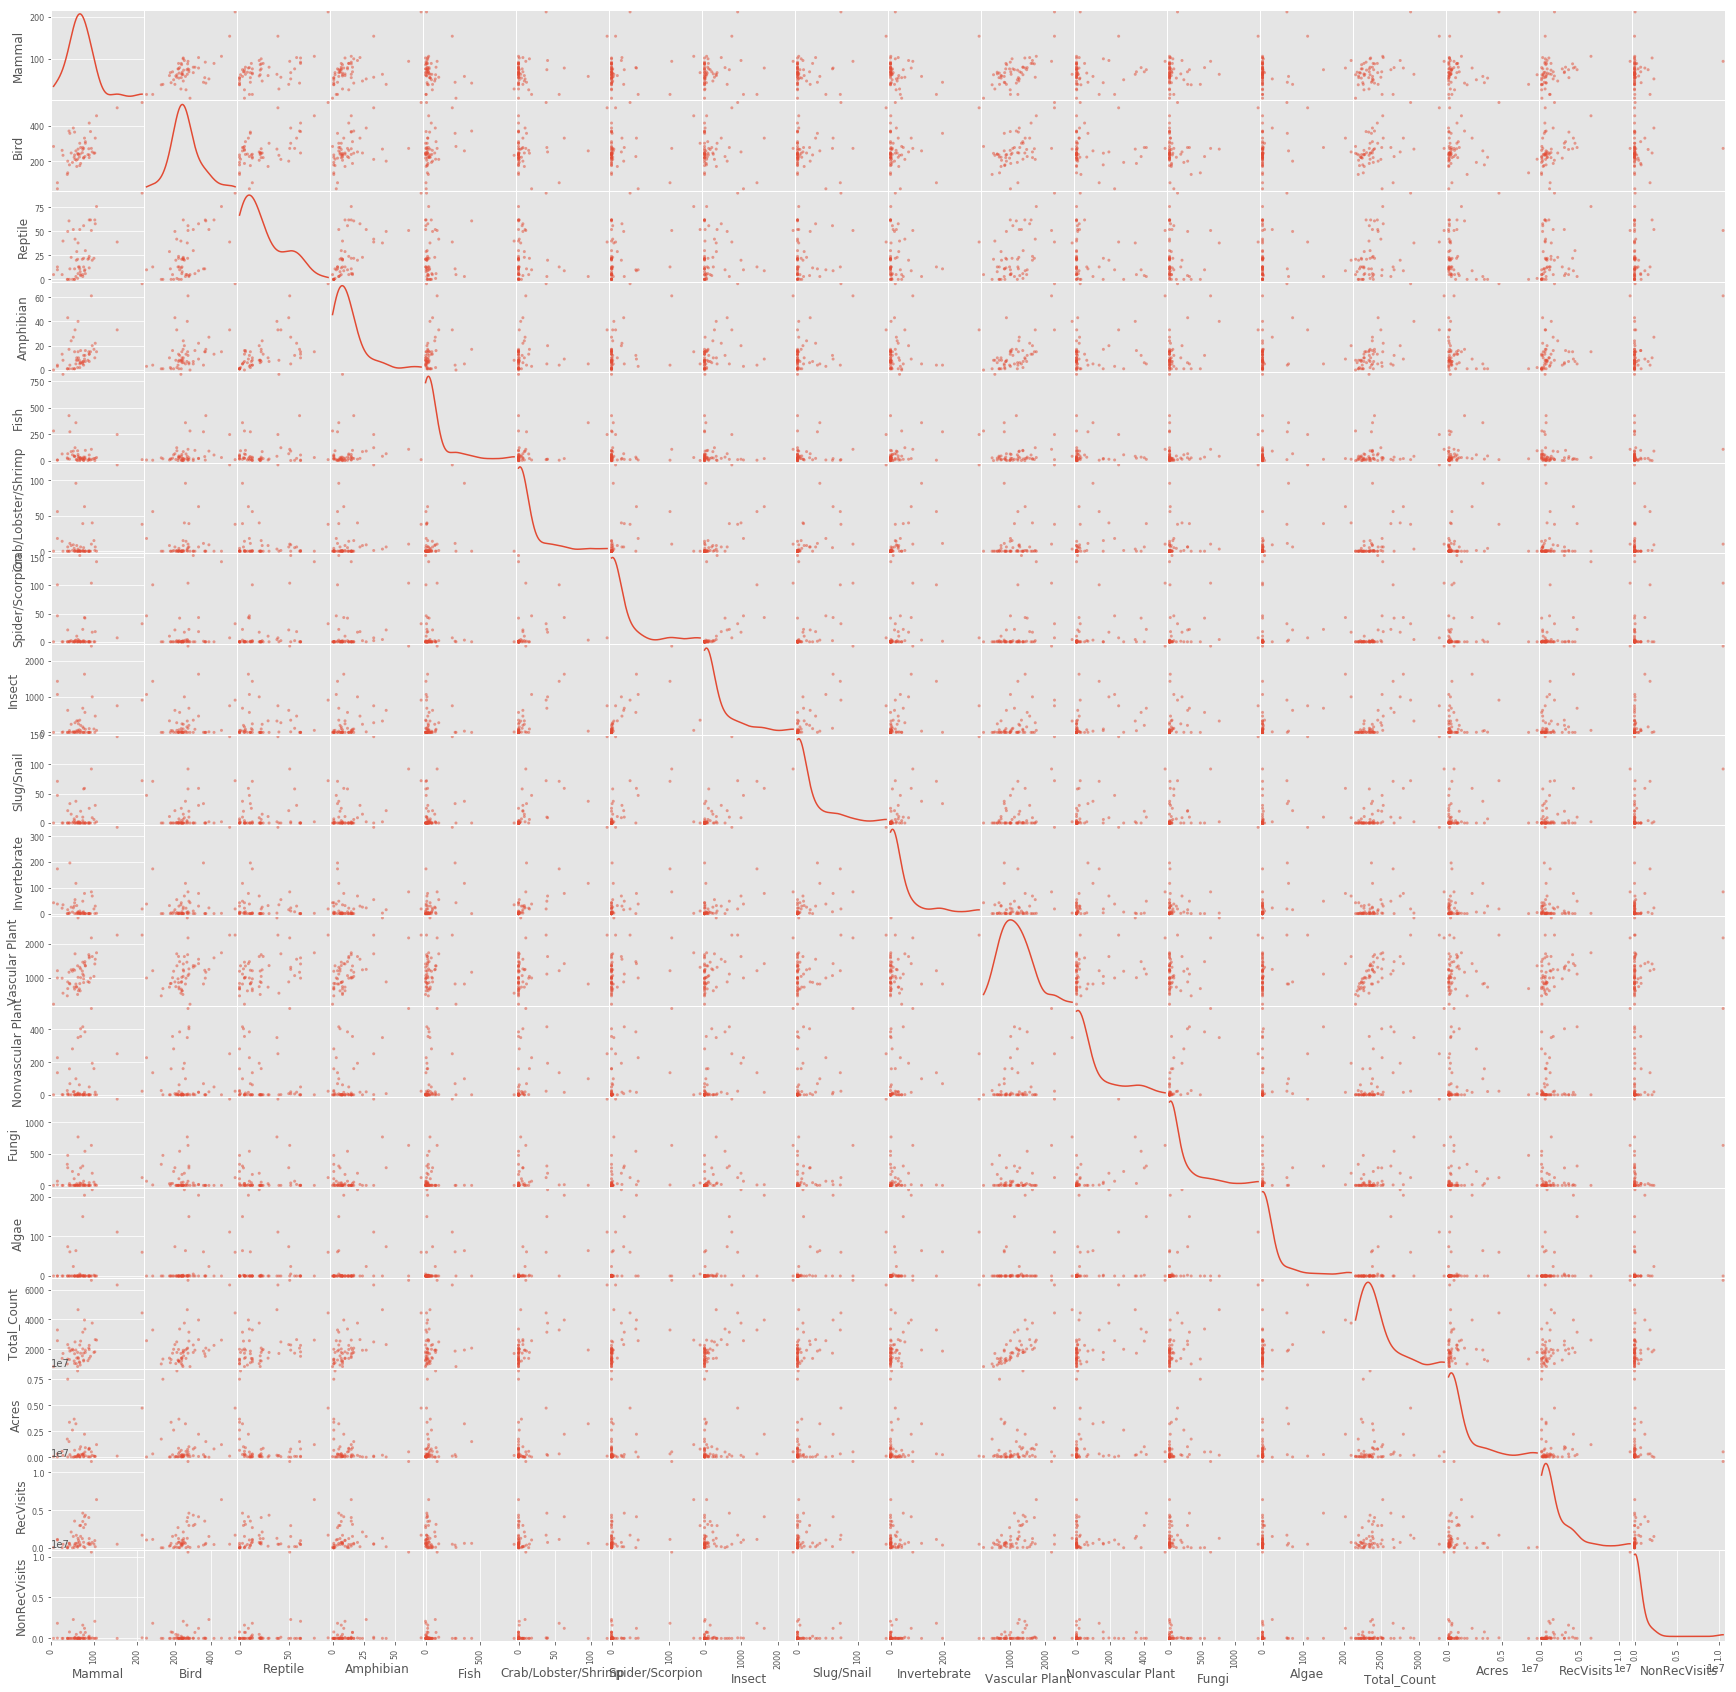

In [23]:
output = pd.plotting.scatter_matrix(Final, alpha=0.5, figsize=(30, 30), diagonal='kde')

**Build and Visualise Correlation Matrix**

The result shows that:  
(1). 'Acres' has low correlations with any other attributes which demonstrates that the size of the park doesn't influence the species and visits counts a lot;  
(2). 'RecVisits' has high correlations with 'Spider/Scorpion' and 'Insect'. However, as many parks don't have these two attributes records, the correlation values are not reliable;  
(3). 'NonRecVisits' also has high correlation value with 'Insect' which is unreliable;  
(4). Both 'RecVisits' and 'NonRecVisits' have relatively high correlation values with total species count. They also have high correlations with each other.

In [24]:
corr = Final.corr()
corr

,Mammal,Bird,Reptile,Amphibian,Fish,Crab/Lobster/Shrimp,Spider/Scorpion,Insect,Slug/Snail,Invertebrate,Vascular Plant,Nonvascular Plant,Fungi,Algae,Total_Count,Acres,RecVisits,NonRecVisits
Mammal,1.000000,0.643479,0.517658,0.548233,-0.242503,0.284378,0.098227,0.185868,0.383692,0.109692,0.599392,0.080480,0.270543,0.256475,0.475327,0.053844,0.236782,0.080948
Bird,0.643479,1.000000,0.600363,0.470597,0.171470,0.264313,0.106484,0.007236,0.286836,0.230004,0.485568,-0.076381,0.165872,0.264282,0.388337,-0.032124,0.253894,0.001824
Reptile,0.517658,0.600363,1.000000,0.630603,0.094950,0.000114,0.342737,0.162001,0.233406,-0.009814,0.494969,-0.134604,0.048200,-0.015194,0.368097,-0.157491,0.188644,0.167128
Amphibian,0.548233,0.470597,0.630603,1.000000,0.017783,0.195669,0.195009,0.494428,0.457418,0.157328,0.679724,0.247097,0.390859,0.173688,0.685467,-0.062404,0.340155,0.426048
Fish,-0.242503,0.171470,0.094950,0.017783,1.000000,0.194078,-0.120386,-0.085335,0.099100,0.321854,-0.132485,-0.042678,0.050795,0.040180,0.058923,0.016557,-0.113397,-0.013087
Crab/Lobster/Shrimp,0.284378,0.264313,0.000114,0.195669,0.194078,1.000000,0.146198,0.464011,0.750853,0.805878,0.280945,0.257589,0.453085,0.653318,0.573410,0.082029,0.028000,0.035473
Spider/Scorpion,0.098227,0.106484,0.342737,0.195009,-0.120386,0.146198,1.000000,0.562465,0.304781,0.170320,0.312328,0.217982,0.102545,0.085427,0.448044,-0.014552,0.534643,0.371140
Insect,0.185868,0.007236,0.162001,0.494428,-0.085335,0.464011,0.562465,1.000000,0.692430,0.429592,0.441089,0.506998,0.386860,0.474810,0.791667,-0.027381,0.515365,0.640109
Slug/Snail,0.383692,0.286836,0.233406,0.457418,0.099100,0.750853,0.304781,0.692430,1.000000,0.774319,0.414233,0.336862,0.559439,0.385544,0.741768,0.012812,0.236300,0.375927
Invertebrate,0.109692,0.230004,-0.009814,0.157328,0.321854,0.805878,0.170320,0.429592,0.774319,1.000000,0.222311,0.251221,0.500703,0.462149,0.550640,-0.067185,0.013130,0.150864


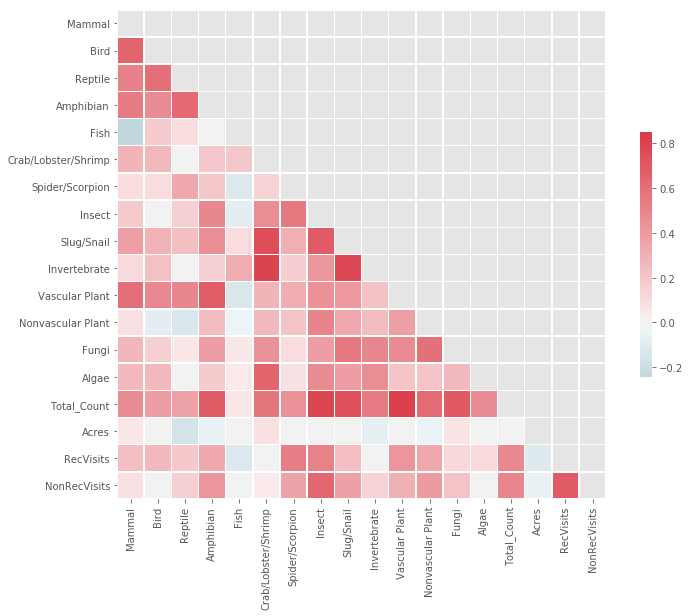

In [25]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.85, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 2.3. Total Species Count and Recreation Visits Count Relationship Analysis

Regression and Clustering methods are used to verify whether the total species count and recreation visits count have relationships.

#### 2.3.1. Data Preparation

Extract 'Park_Name', 'RecVisits', 'Total_Count' attributes to form a new DataFrame and order it based on 'RecVisits' from high to low to see which park has more recreation visits more clearly.

In [26]:
Park_RecVis = Final[['Park_Name', 'RecVisits', 'Total_Count']]
Park_RecVis_Order = Park_RecVis.sort_values(by = 'RecVisits', ascending = False)
Park_RecVis_Order

,Park_Name,RecVisits,Total_Count
25,Great Smoky Mountains National Park,11421200,6623
21,Grand Canyon National Park,6380495,2622
45,Rocky Mountain National Park,4590493,3152
55,Zion National Park,4320033,1796
53,Yellowstone National Park,4115000,3966
54,Yosemite National Park,4009436,2088
0,Acadia National Park,3537575,1709
22,Grand Teton National Park,3491151,2030
41,Olympic National Park,3104455,1948
20,Glacier National Park,2965309,2556


Draw the boxplot to check outliers and visualise data by creating the diagram as before, though the total count of species cannot be seen as it's too small compared to the amount of recreation visits. The graph indicates there are 6 outliers which have much more recreation visits than other parks, especially for 'Great Smoky Mountains National Park' and 'Grand Canyon National Park'.

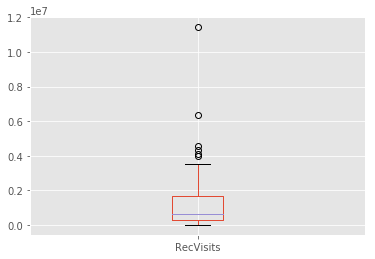

In [27]:
Park_RecVis_Order.boxplot('RecVisits')

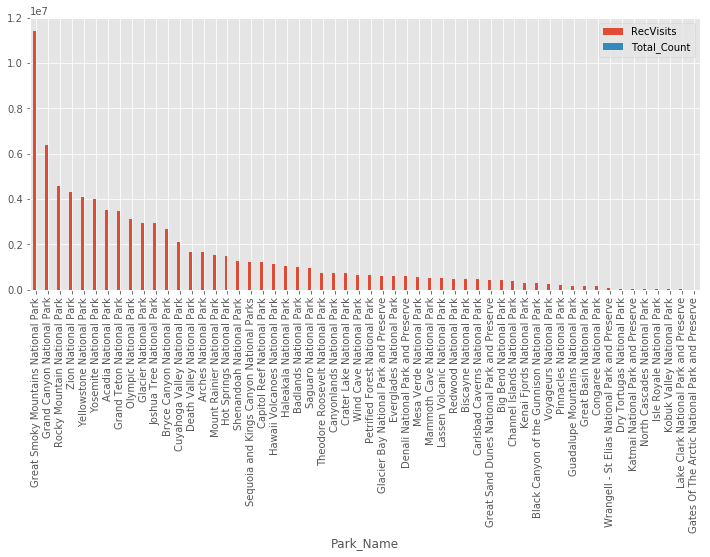

In [28]:
Park_RecVis_Order.plot.bar(x = 'Park_Name', figsize=(12, 5))

#### 2.3.2. Regression

First, we try to utilize linear regression to analyse the relationship between total species count and recreation visit count. As outliers may bring huge impact for the regression result, we remove the outliers which are huger than others, such as 25-'Great Smoky Mountains National Park' and 44-'Redwood National Park' in 'Total_Count' attribute and 25-'Great Smoky Mountains National Park' and 21-'Grand Canyon National Park' in 'RecVisits' attribute, but store the outliners which slightly exceed the line for the sample size of this project is small.  

In [29]:
RecVis_Final = Park_RecVis_Order.drop([25, 21, 44], axis = 0)
RecVis_Final

,Park_Name,RecVisits,Total_Count
45,Rocky Mountain National Park,4590493,3152
55,Zion National Park,4320033,1796
53,Yellowstone National Park,4115000,3966
54,Yosemite National Park,4009436,2088
0,Acadia National Park,3537575,1709
22,Grand Teton National Park,3491151,2030
41,Olympic National Park,3104455,1948
20,Glacier National Park,2965309,2556
31,Joshua Tree National Park,2942382,2294
6,Bryce Canyon National Park,2679478,1286


**Build regression model by utilizing scikit-learn**

The intercept value is positive which demonstrates that the amount of total species influences the number of recreation visits positively. The `lr.score(x,y)` value stands for R2 Score which is a little low, meaning that the total species count can only explain 9% variation of recreation visits count.

As we observe the scatter plot carefully, we can discover that as the increase of total species count, the increase of recreation visits are tending to two different orientations. It implies this dataset is not suitable for regression but may be suitable for clustering.

In [30]:
from sklearn.linear_model import LinearRegression
y = RecVis_Final['RecVisits'].values.reshape(len(RecVis_Final['RecVisits']), 1)
x = RecVis_Final['Total_Count'].values.reshape(len(RecVis_Final['Total_Count']), 1)
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
lr.fit(x,y).intercept_

array([317793.73383129])

In [32]:
lr.fit(x,y).coef_

array([[444.9577706]])

In [33]:
lr.score(x,y)

0.0922323731454806

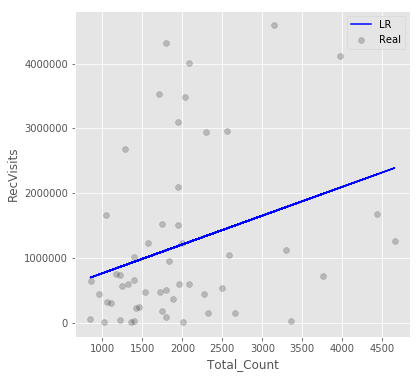

In [34]:
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='black', alpha=0.2, label='Real')
plt.plot(x, lr.predict(x), color='blue', label='LR')
plt.xlabel('Total_Count')
plt.ylabel('RecVisits')
plt.legend()
plt.show()

#### 2.3.3. Clustering

Since clustering is sensitive to data value and variance size as clusters are more likely to be impacted by bigger values with bigger variance, we **standardise our dataset** first. Then, we employ DBSCAN, Affinity Propagation and K-Means algorithms which are widely used and suitable for the small sample size to do the clustering and compare the results.

In [123]:
import sklearn.preprocessing as preprocessing
scaled = preprocessing.scale(Park_RecVis_Order['RecVisits'])
scalednew = pd.DataFrame({'Column1': scaled[:, 0], 'Column2': scaled[:, ]})

/Users/yeyafei/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


NameError: name 'index' is not defined

In [117]:
scalednew

,Column1,Column2
0,5.095822,3.769249
1,2.519443,0.413173
2,1.604547,0.857742
3,1.466311,-0.279683
4,1.361516,1.540533
5,1.307560,-0.034751
6,1.066385,-0.352659
7,1.042657,-0.083402
8,0.845011,-0.152184
9,0.773892,0.357812


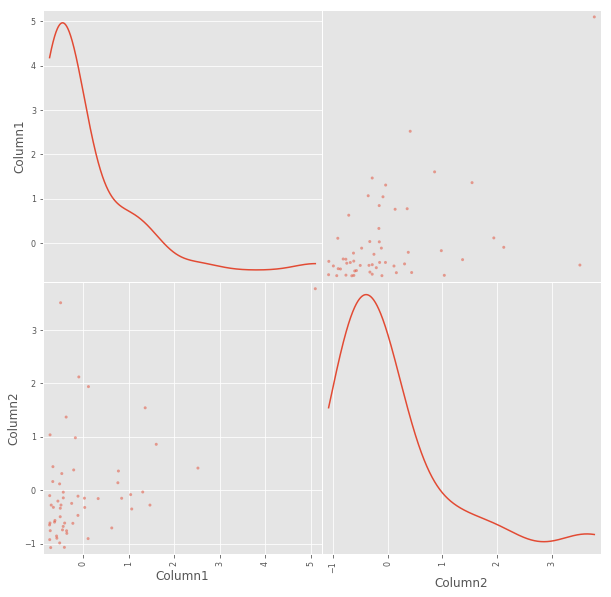

In [119]:
output = pd.plotting.scatter_matrix(scalednew, alpha=0.5, figsize=(10, 10), diagonal='kde')

For the clustering, different from regression, we retain the outliers because they can make the clustering more obviously.

Because the sample size for this project is very small which is only 56, through adjusting the parameters for each algorithms, we can get three same results. Therefore, we cannot decide which algorithm is more suitable in this case. For the running time according to the `time.time()` results, though it varies every running time, the running time for the DBSCAN in general is much shorter than Affinity Propagation and K-Means.

The silhouette score for the final clustering model is 0.61. It's a quite acceptable score as this score varies from 1 the best to -1 the worst.

The labeled scatter plot shows all points are seperated by a inclined line. The part closed to the origin is more gathering, while the other part is more dispersive. This means when a park with less species and recreation visits, it's more likely to be similar with other parks in the similar situation. However, if a park has higher amount of species or recreation visits, it may differ a lot. For example, a park with many species may have only a few visits, while another park with similar amount of species may attract tens of millions of visitors every year.

##### 2.3.3.1. DBSCAN

In [36]:
from sklearn.cluster import DBSCAN
import time # to calculate the running time of each algorithm for fitting
dbscan = DBSCAN(eps=0.8, min_samples=6) # set the parameters for DBSCAN
start = time.time() # set the start time
dbscan.fit(scaled) # run the .fit() function on the scaled dataset
elapsed = (time.time() - start) # calculate the elapsed time by the end time minus the start time
elapsed

0.000997304916381836

In [37]:
dbscan_labels = dbscan.labels_ # generate the labels

In [38]:
from sklearn import metrics
metrics.silhouette_score(scaled, dbscan_labels) # to calculate the Silhouette Score

0.6138822214016534

In [39]:
Park_RecVis_Order['labels']=dbscan_labels # add clustering labels to the original dataset
Park_RecVis_Order

,Park_Name,RecVisits,Total_Count,labels
25,Great Smoky Mountains National Park,11421200,6623,-1
21,Grand Canyon National Park,6380495,2622,-1
45,Rocky Mountain National Park,4590493,3152,-1
55,Zion National Park,4320033,1796,0
53,Yellowstone National Park,4115000,3966,-1
54,Yosemite National Park,4009436,2088,0
0,Acadia National Park,3537575,1709,0
22,Grand Teton National Park,3491151,2030,0
41,Olympic National Park,3104455,1948,0
20,Glacier National Park,2965309,2556,0


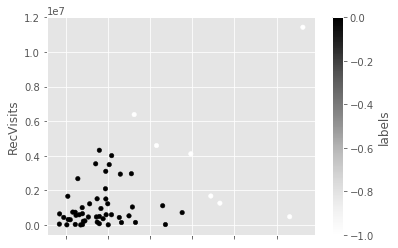

In [40]:
# plpt the labeled scatter graph
Park_RecVis_Order.plot.scatter(x='Total_Count', y='RecVisits', c='labels')

##### 2.3.3.2.  Affinity Propagation

In [41]:
from sklearn.cluster import AffinityPropagation
start = time.time()
AffinityPropagation = AffinityPropagation(preference=-50).fit(scaled)
elapsed = (time.time() - start)
elapsed

0.016482830047607422

In [42]:
AffinityPropagation_labels = AffinityPropagation.labels_

In [43]:
metrics.silhouette_score(scaled, AffinityPropagation_labels)

0.6138822214016534

In [44]:
Park_RecVis_Order['labels']=AffinityPropagation_labels
Park_RecVis_Order

,Park_Name,RecVisits,Total_Count,labels
25,Great Smoky Mountains National Park,11421200,6623,0
21,Grand Canyon National Park,6380495,2622,0
45,Rocky Mountain National Park,4590493,3152,0
55,Zion National Park,4320033,1796,1
53,Yellowstone National Park,4115000,3966,0
54,Yosemite National Park,4009436,2088,1
0,Acadia National Park,3537575,1709,1
22,Grand Teton National Park,3491151,2030,1
41,Olympic National Park,3104455,1948,1
20,Glacier National Park,2965309,2556,1


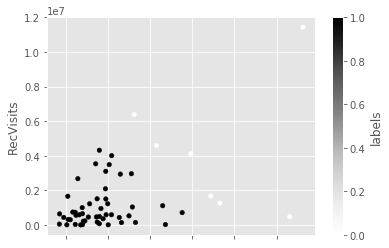

In [45]:
Park_RecVis_Order.plot.scatter(x='Total_Count', y='RecVisits', c='labels')

##### 2.3.3.3. K-Means

In [46]:
from sklearn.cluster import KMeans
start = time.time()
kmeans = KMeans(n_clusters=2, random_state=0).fit(scaled)
elapsed = (time.time() - start)
elapsed

0.01764702796936035

In [47]:
kmeans_labels = kmeans.labels_

In [48]:
metrics.silhouette_score(scaled, kmeans_labels)

0.6138822214016534

In [49]:
Park_RecVis_Order['labels']=kmeans_labels
Park_RecVis_Order

,Park_Name,RecVisits,Total_Count,labels
25,Great Smoky Mountains National Park,11421200,6623,1
21,Grand Canyon National Park,6380495,2622,1
45,Rocky Mountain National Park,4590493,3152,1
55,Zion National Park,4320033,1796,0
53,Yellowstone National Park,4115000,3966,1
54,Yosemite National Park,4009436,2088,0
0,Acadia National Park,3537575,1709,0
22,Grand Teton National Park,3491151,2030,0
41,Olympic National Park,3104455,1948,0
20,Glacier National Park,2965309,2556,0


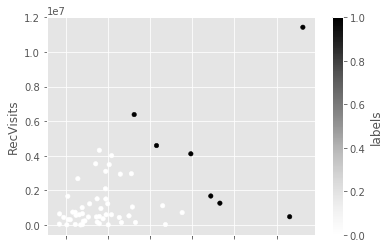

In [50]:
Park_RecVis_Order.plot.scatter(x='Total_Count', y='RecVisits', c='labels')

### 2.4. Total Species Count and Non-Recreation Visits Count Relationship Analysis

Regression and Clustering methods are used to verify whether the total species count and non-recreation visits count have relationships. 

This part's steps are the same with 2.3, so there is no repeated explaination for the similar procedure.

#### 2.4.1. Data Preparation

In [51]:
Park_NonRecVis = Final[['Park_Name', 'NonRecVisits', 'Total_Count']]
Park_NonRecVis_Order = Park_NonRecVis.sort_values(by = 'NonRecVisits', ascending = False)
Park_NonRecVis_Order

,Park_Name,NonRecVisits,Total_Count
25,Great Smoky Mountains National Park,10544377,6623
29,Hot Springs National Park,2306072,1950
46,Saguaro National Park,2089346,1834
28,Hawaii Volcanoes National Park,1847328,3298
22,Grand Teton National Park,1617873,2030
53,Yellowstone National Park,1229439,3966
15,Denali National Park and Preserve,784032,1320
39,Mount Rainier National Park,737168,1743
41,Olympic National Park,728811,1948
1,Arches National Park,492238,1048


We can judge from the boxplot that there are a lot of outliers for many parks only have very few non-creation visits every year.

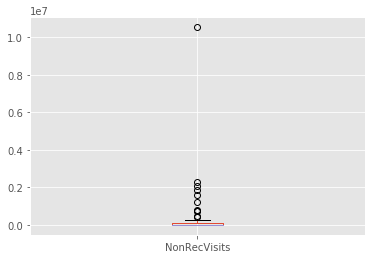

In [52]:
Park_NonRecVis_Order.boxplot('NonRecVisits')

We can also learn form the diagram below that, again, the most obvious outliner is 'Great Smoky Mountains National Park'.

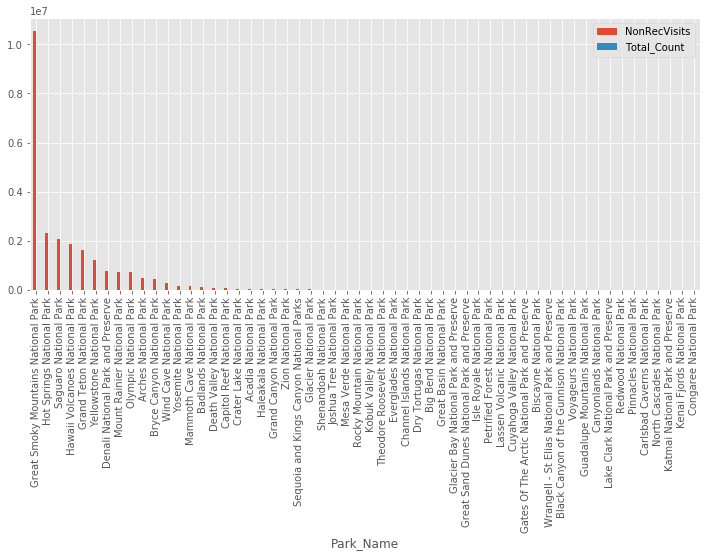

In [53]:
Park_NonRecVis_Order.plot.bar(x = 'Park_Name', figsize=(12, 5))

#### 2.4.2. Regression

As before, we drop the extreme outliners first. The regression result shows R2 is only 0.018 which suggests that these two factors have little linear relationship.

In [54]:
NonRecVis_Final = Park_NonRecVis_Order.drop([25, 44], axis = 0)
NonRecVis_Final

,Park_Name,NonRecVisits,Total_Count
29,Hot Springs National Park,2306072,1950
46,Saguaro National Park,2089346,1834
28,Hawaii Volcanoes National Park,1847328,3298
22,Grand Teton National Park,1617873,2030
53,Yellowstone National Park,1229439,3966
15,Denali National Park and Preserve,784032,1320
39,Mount Rainier National Park,737168,1743
41,Olympic National Park,728811,1948
1,Arches National Park,492238,1048
6,Bryce Canyon National Park,419953,1286


In [55]:
from sklearn.linear_model import LinearRegression
y = NonRecVis_Final['NonRecVisits'].values.reshape(len(NonRecVis_Final['NonRecVisits']), 1)
x = NonRecVis_Final['Total_Count'].values.reshape(len(NonRecVis_Final['Total_Count']), 1)
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
lr.fit(x,y).intercept_

array([80782.11973904])

In [57]:
lr.fit(x,y).coef_

array([[84.19366537]])

In [58]:
lr.score(x,y)

0.017746032171099158

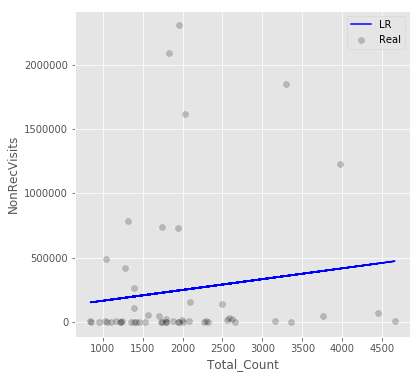

In [59]:
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='black', alpha=0.2, label='Real')
plt.plot(x, lr.predict(x), color='blue', label='LR')
plt.xlabel('Total_Count')
plt.ylabel('NonRecVisits')
plt.legend()
plt.show()

#### 2.4.3. Clustering

In [60]:
scaled = preprocessing.scale(Park_NonRecVis_Order[['NonRecVisits', 'Total_Count']])
scaled

array([[ 6.89805575e+00,  3.76924934e+00],
       [ 1.28169517e+00, -1.50506348e-01],
       [ 1.13394495e+00, -2.47808222e-01],
       [ 9.68952226e-01,  9.80208539e-01],
       [ 8.12524172e-01, -8.34016067e-02],
       [ 5.47714189e-01,  1.54053313e+00],
       [ 2.44063582e-01, -6.78956183e-01],
       [ 2.12114641e-01, -3.24139865e-01],
       [ 2.06417361e-01, -1.52183966e-01],
       [ 4.51367007e-02, -9.07112303e-01],
       [-4.14268684e-03, -7.07475698e-01],
       [-1.12110801e-01, -6.16045489e-01],
       [-1.87054193e-01, -3.47506695e-02],
       [-1.93004397e-01,  3.09999938e-01],
       [-2.18783615e-01, -6.21078344e-01],
       [-2.45305245e-01,  1.93728991e+00],
       [-2.52648238e-01, -4.72609105e-01],
       [-2.56626176e-01,  1.36773842e+00],
       [-2.58330519e-01, -3.52659380e-01],
       [-2.70609973e-01,  3.77943488e-01],
       [-2.74250451e-01,  4.13173477e-01],
       [-2.75510302e-01, -2.79682974e-01],
       [-2.78523581e-01, -1.12759931e-01],
       [-2.

By adjusting the parameters of three clustering algorithms:  
(1). set DBSCAN(eps=2, min_samples=2) (just set eps - the maximun distance between two samples to a big value, and min_samples - the number of samples in a neighborhood to be considered as a core point to a small value);  
(2). set AffinityPropagation(preference=-30);  
(3). set KMeans(n_clusters=3, random_state=0);  
We can get three same result, which just leaves out the 'Great Smoky Mountains National Park', but cluster all other points together. At this time, the silhouette score value is the highest, which is 0.85.

However, as we want to explore the clustering except for the 'Great Smoky Mountains National Park', we change the parameter setting as below shows. We can find because of the difference in algotithms, the clustering results can vary a lot:  
(1). The labeled scatter plot for DBSCAN displays that many points are considered as noises. Like the boxplots shown in 1.2 and 2.4.1, there are many outliners besides the main part which is with low non-recreation visits values and relatively low species values. DBSCAN juct kicks these outliners out;    
(2). The labeled scatter plots for Affinity Propagation and KMeans tell another story. Except for 'Great Smoky Mountains National Park', a line parallel the Y axis seperates the rest points into two parts. In the right, as the growing of total species count, the possibility of higher non-recreation visits rises; in the left, on the opposite, the likelihood of having higher non-recreation visits decreases as the increasing of total species count.  

As all three models get a silhouette score around 0.6, the results of these three are acceptable.

For the running time: As we all konw, when the sample size is big, the running time for Affinity Propagation will be much longer than KMeans, as Affinity Propagation has to compare every pair of points. However, when the smaple size is small like this case, the running time for Affinity Propagation is shorter than KMeans, though still much longer than DBSCAN. Actually, we don't need to worry about running time in this case, as all three are very short.

##### 2.4.3.1. DBSCAN

In [61]:
dbscan = DBSCAN(eps=0.6, min_samples=6)
start = time.time()
dbscan.fit(scaled)
elapsed = (time.time() - start)
elapsed

0.0017499923706054688

In [62]:
dbscan_labels = dbscan.labels_

In [63]:
metrics.silhouette_score(scaled, dbscan_labels)

0.609507083703471

In [64]:
Park_NonRecVis_Order['labels']=dbscan_labels
Park_NonRecVis_Order

,Park_Name,NonRecVisits,Total_Count,labels
25,Great Smoky Mountains National Park,10544377,6623,-1
29,Hot Springs National Park,2306072,1950,-1
46,Saguaro National Park,2089346,1834,-1
28,Hawaii Volcanoes National Park,1847328,3298,-1
22,Grand Teton National Park,1617873,2030,-1
53,Yellowstone National Park,1229439,3966,-1
15,Denali National Park and Preserve,784032,1320,0
39,Mount Rainier National Park,737168,1743,0
41,Olympic National Park,728811,1948,0
1,Arches National Park,492238,1048,0


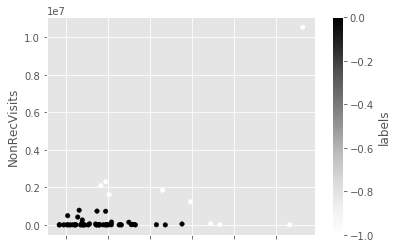

In [65]:
Park_NonRecVis_Order.plot.scatter(x='Total_Count', y='NonRecVisits', c='labels')

##### 2.4.3.2.  Affinity Propagation

In [66]:
from sklearn.cluster import AffinityPropagation
start = time.time()
AffinityPropagation = AffinityPropagation(preference=-30).fit(scaled)
elapsed = (time.time() - start)
elapsed

0.0077250003814697266

In [67]:
AffinityPropagation_labels = AffinityPropagation.labels_

In [68]:
metrics.silhouette_score(scaled, AffinityPropagation_labels)

0.6289362827266254

In [69]:
Park_NonRecVis_Order['labels']=AffinityPropagation_labels
Park_NonRecVis_Order

,Park_Name,NonRecVisits,Total_Count,labels
25,Great Smoky Mountains National Park,10544377,6623,0
29,Hot Springs National Park,2306072,1950,2
46,Saguaro National Park,2089346,1834,2
28,Hawaii Volcanoes National Park,1847328,3298,1
22,Grand Teton National Park,1617873,2030,2
53,Yellowstone National Park,1229439,3966,1
15,Denali National Park and Preserve,784032,1320,2
39,Mount Rainier National Park,737168,1743,2
41,Olympic National Park,728811,1948,2
1,Arches National Park,492238,1048,2


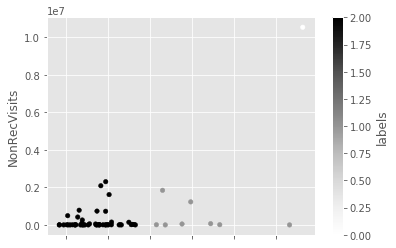

In [70]:
Park_NonRecVis_Order.plot.scatter(x='Total_Count', y='NonRecVisits', c='labels')

##### 2.4.3.3. K-Means

In [71]:
start = time.time()
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled)
elapsed = (time.time() - start)
elapsed

0.014966011047363281

In [72]:
kmeans_labels = kmeans.labels_

In [73]:
metrics.silhouette_score(scaled, kmeans_labels)

0.6289362827266254

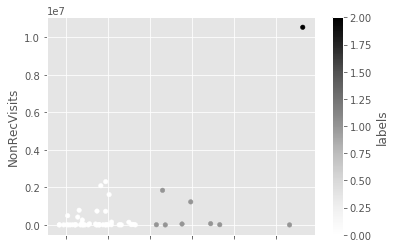

In [74]:
Park_NonRecVis_Order['labels']=kmeans_labels
Park_NonRecVis_Order.plot.scatter(x='Total_Count', y='NonRecVisits', c='labels')

## 3. Recreation Visits Prediction Model Building

In this part, we will build Recreation Visits Prediction Model based on different categories' species count. We attempt to build it by classification, as the regression result shown in part 2 indicates that points with similar x may differ in y hugely. Therefore, classification is more suitable for this project and we try to classify the data into 3 levels and 2 levels seperately to check which works better. We also use three different classifiers: 'Support Vector Machines', 'Random Forests' and 'Neural Networks' to compare the difference. 

### 3.1. Three-Level Classification 

First, we attempt to divide the data into three levels. We set '100000' and '1000000' as the division lines for we assume that the National Park Service may take different actions in different orders of magnitude of visits.

#### 3.1.1. Data Preparation

We utilize `apply()` and `lambda` functions together to add a new label column according to the values in 'RecVisits' columns.

In [75]:
Final['New'] = Final.apply(lambda x: 2 if x.RecVisits > 1000000 else (1 if x.RecVisits > 100000 else 0),axis=1)
Final

,Park_Name,Mammal,Bird,Reptile,Amphibian,Fish,Crab/Lobster/Shrimp,Spider/Scorpion,Insect,Slug/Snail,Invertebrate,Vascular Plant,Nonvascular Plant,Fungi,Algae,Total_Count,Acres,RecVisits,NonRecVisits,New
0,Acadia National Park,55,364,11,15,38,0,0,0,0,0,1226,0,0,0,1709,47390,3537575,47100,2
1,Arches National Park,59,205,20,8,11,0,0,0,0,0,745,0,0,0,1048,76519,1663557,492238,2
2,Badlands National Park,64,239,13,10,24,0,1,239,0,1,625,0,173,0,1389,242756,1008942,105109,2
3,Big Bend National Park,89,415,62,13,53,0,0,0,0,0,1589,48,0,0,2269,801163,440091,2364,1
4,Biscayne National Park,28,233,40,8,818,0,0,11,0,34,554,0,0,0,1726,172924,469253,0,1
5,Black Canyon of the Gunnison National Park,67,175,11,2,16,0,0,0,0,0,835,0,0,0,1106,32950,308962,0,1
6,Bryce Canyon National Park,76,217,13,4,1,0,0,0,0,0,975,0,0,0,1286,35835,2679478,419953,2
7,Canyonlands National Park,76,220,22,7,33,0,0,0,0,0,865,0,0,0,1223,337598,739449,0,1
8,Capitol Reef National Park,73,248,21,6,15,0,0,0,0,0,1203,0,0,0,1566,241904,1227627,55435,2
9,Carlsbad Caverns National Park,92,367,62,15,5,0,0,0,0,0,995,0,0,0,1536,46766,465912,0,1


Seperate the attributes columns into 'data' and the label column into 'lab'.

In [76]:
data = Final.iloc[:, 1:14]
lab = Final['New']

Create a label dataset by using LabelEncoder and check the result for correctness.

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(lab)

LabelEncoder()

In [78]:
le.classes_

array([0, 1, 2])

In [79]:
lab = le.transform(lab)

Standardise the attributes data by using Z-Score as classification is sensitive to scales.

In [80]:
at_scaled = (data - data.mean()) / data.std()
at_scaled

,Mammal,Bird,Reptile,Amphibian,Fish,Crab/Lobster/Shrimp,Spider/Scorpion,Insect,Slug/Snail,Invertebrate,Vascular Plant,Nonvascular Plant,Fungi
0,-0.435879,1.151771,-0.571155,0.123149,-0.240999,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,0.125993,-0.563965,-0.460029
1,-0.311817,-0.621594,-0.175196,-0.374525,-0.440338,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,-0.861998,-0.563965,-0.460029
2,-0.156739,-0.242384,-0.483164,-0.232333,-0.344360,-0.437341,-0.381952,-0.036423,-0.498134,-0.465930,-1.108482,-0.563965,0.258456
3,0.618649,1.720586,1.672612,-0.019044,-0.130256,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,0.871608,-0.209608,-0.460029
4,-1.273297,-0.309303,0.704713,-0.374525,5.517674,-0.437341,-0.411660,-0.518342,-0.498134,0.104294,-1.254319,-0.563965,-0.460029
5,-0.063693,-0.956191,-0.571155,-0.801103,-0.403424,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,-0.677135,-0.563965,-0.460029
6,0.215447,-0.487755,-0.483164,-0.658911,-0.514167,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,-0.389570,-0.563965,-0.460029
7,0.215447,-0.454295,-0.087205,-0.445622,-0.277914,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,-0.615514,-0.563965,-0.460029
8,0.122400,-0.142005,-0.131201,-0.516718,-0.410806,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,0.078750,-0.563965,-0.460029
9,0.711695,1.185231,1.672612,0.123149,-0.484636,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,-0.348489,-0.563965,-0.460029


Transfer the scaled attributes data into array, so that it can be read in next pca step.

In [81]:
at_mat = at_scaled.values

#### 3.1.2. Feature Selection

Utilize **Principal Components Analysis (PCA)** to reduce the dimensions of attributes by sorting important elements and discarding less useful attributes

In [82]:
from sklearn.decomposition import PCA
pca = PCA() # create PCA class object
at_decomp = pca.fit_transform(at_mat) # run PCA and write components back to array at_decomp

Run `.explained_variance_ratio_` function to investigate how many components have been identified and how much variance has been explained by each of our components.

In [83]:
pca.explained_variance_ratio_

array([0.37915876, 0.18023828, 0.12350607, 0.08715899, 0.07140405,
       0.04325041, 0.02923978, 0.02378043, 0.01753268, 0.01509136,
       0.0129742 , 0.01006771, 0.00659728])

Visualise the explained variance ratio to help us select components

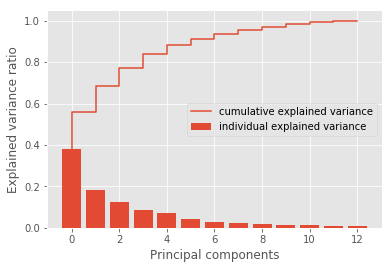

In [84]:
pcasum = np.cumsum(pca.explained_variance_ratio_) # calculate the sum value of explained_variance_ratio_
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label='individual explained variance')
plt.step(range(len(pca.explained_variance_ratio_)), pcasum, label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

As the first three components have explained the variance about 70% which is suitable for future analysis, we select them as the final components.

In [85]:
at_decomp_selected = at_decomp[:, pca.explained_variance_ratio_ > 0.1] # extract the columns

Visualise how all attribute points locate based on these three components dimensions to analyse their distribution. We can see three levels points are mixed to some extents which implies the difficulties in classification.

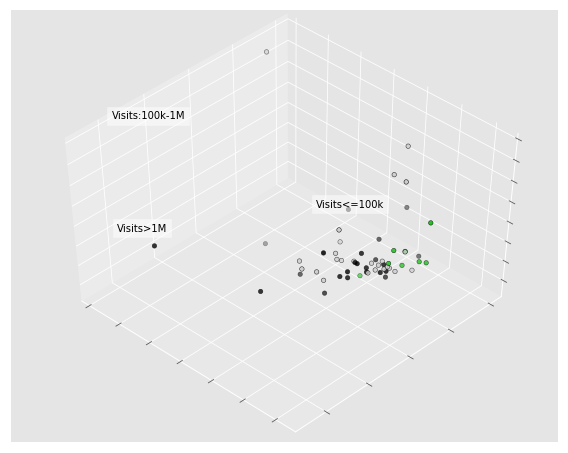

In [86]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
centers = [[1, 1], [-1, -1], [1, -1]]
X = at_decomp_selected
y = lab

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Visits<=100k', 0), ('Visits:100k-1M', 1), ('Visits>1M', 2)]:
    ax.text3D(X[y == label, 0].max(),
              X[y == label, 1].max(),
              X[y == label, 2].max(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

#### 3.1.3. Data Reorganization

Split data into training and testing subsets.

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
train_d, test_d, train_lab, test_lab = train_test_split(at_decomp_selected, lab, test_size=0.25)

In [89]:
len(train_d),len(test_d),len(train_lab),len(test_lab)

(42, 14, 42, 14)

#### 3.1.4. Classification Model Building

As the sample size is small, the classification results are varied a lot according to the test data and train data are seperated randomly. It's very common that this time, SVM runs much better than Neural Networks, but next time, much worse. It's also very frequent that a model has high mean_test_score during training, but when compared with the test data, the precision and recall scores are very low. Therefore, it's difficult to choose which is the best classification model for this situation. The average test scores for these three models according to several runs are also around 0.5 which means all three models don't work well and usually do very bad in classify '0' points.

##### 3.1.4.1. Support Vector Machines

Set parameters for SVM and select the best settings by using GridSearchCV. For cross-validation, set 'cv=3', as the sample size is small.

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters_svm = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 10, 100, 1000]}
grid_search = GridSearchCV(SVC(), parameters_svm, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(train_d,train_lab)
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.500000,0.029235,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}"
1,0.500000,0.029235,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}"
2,0.500000,0.029235,"{'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}"
3,0.523810,0.093947,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}"
4,0.500000,0.029235,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}"
5,0.500000,0.029235,"{'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}"
6,0.571429,0.050551,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}"
7,0.523810,0.093947,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}"
8,0.500000,0.029235,"{'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}"
9,0.571429,0.050551,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}"


Generate the report and graph for the confusion matrix.

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
          1       0.33      0.11      0.17         9
          2       0.09      0.50      0.15         2

avg / total       0.23      0.14      0.13        14



/Users/yeyafei/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


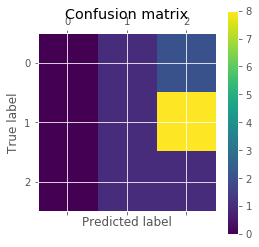

In [91]:
predictions = grid_search.predict(test_d) # predict function automatically uses the best parameters
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)
print (metrics.classification_report(test_lab, predictions))
# visualise the confusion matrix
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### 3.1.4.2. Random Forests

Set parameters for Random Forests and select the best settings by using GridSearchCV. For cross-validation, set 'cv=3', as the sample size is small.

In [92]:
from sklearn.ensemble import RandomForestClassifier
parameters_rf = {'n_estimators': [100, 200, 500], 'max_features': ['sqrt', 'log2', None]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, parameters_rf, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(train_d,train_lab)
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.714286,0.051576,"{'max_features': 'sqrt', 'n_estimators': 100}"
1,0.666667,0.084412,"{'max_features': 'sqrt', 'n_estimators': 200}"
2,0.690476,0.077123,"{'max_features': 'sqrt', 'n_estimators': 500}"
3,0.666667,0.084412,"{'max_features': 'log2', 'n_estimators': 100}"
4,0.690476,0.070507,"{'max_features': 'log2', 'n_estimators': 200}"
5,0.714286,0.051576,"{'max_features': 'log2', 'n_estimators': 500}"
6,0.738095,0.037588,"{'max_features': None, 'n_estimators': 100}"
7,0.738095,0.037588,"{'max_features': None, 'n_estimators': 200}"
8,0.738095,0.037588,"{'max_features': None, 'n_estimators': 500}"


Generate the report and graph for the confusion matrix.

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
          1       0.57      0.44      0.50         9
          2       0.00      0.00      0.00         2

avg / total       0.37      0.29      0.32        14



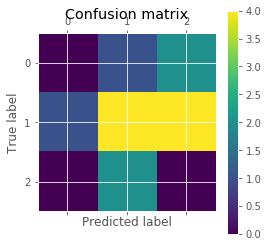

In [93]:
predictions = grid_search.predict(test_d) # predict function automatically uses the best params
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)
print (metrics.classification_report(test_lab, predictions))
# visualise the confusion matrix
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### 3.1.4.3. Neural Networks

Set parameters for MLP and select the best settings by using GridSearchCV. For cross-validation, set 'cv=3', as the sample size is small.

In [94]:
from sklearn.neural_network import MLPClassifier
parameters_mlp = {'hidden_layer_sizes': [20, 50, 100], 'activation': ['identity', 'logistic'], 'solver': ['lbfgs', 'sgd', 'adam'], 'max_iter': [10000]}
mlp = MLPClassifier()
grid_search = GridSearchCV(mlp, parameters_mlp, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(train_d,train_lab)
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.571429,0.078857,"{'activation': 'identity', 'hidden_layer_sizes..."
1,0.619048,0.117870,"{'activation': 'identity', 'hidden_layer_sizes..."
2,0.619048,0.075176,"{'activation': 'identity', 'hidden_layer_sizes..."
3,0.571429,0.078857,"{'activation': 'identity', 'hidden_layer_sizes..."
4,0.571429,0.105161,"{'activation': 'identity', 'hidden_layer_sizes..."
5,0.595238,0.103699,"{'activation': 'identity', 'hidden_layer_sizes..."
6,0.571429,0.078857,"{'activation': 'identity', 'hidden_layer_sizes..."
7,0.571429,0.105161,"{'activation': 'identity', 'hidden_layer_sizes..."
8,0.571429,0.078857,"{'activation': 'identity', 'hidden_layer_sizes..."
9,0.619048,0.066889,"{'activation': 'logistic', 'hidden_layer_sizes..."


Generate the report and graph for the confusion matrix.

             precision    recall  f1-score   support

          0       0.50      0.33      0.40         3
          1       0.62      0.56      0.59         9
          2       0.00      0.00      0.00         2

avg / total       0.51      0.43      0.46        14



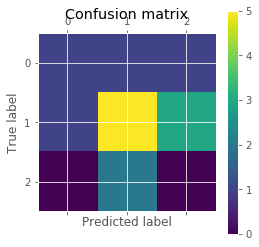

In [95]:
predictions = grid_search.predict(test_d) # predict function automatically uses the best params
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)
print (metrics.classification_report(test_lab, predictions))
# visualise the confusion matrix
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 3.2. Two-Level Classification 

#### 3.2.1. Data Preparation

We take the same steps in 3.1.1 to process the data, but only set one classification line as RecVisits = 800000.

In [96]:
Final['New'] = Final.apply(lambda x: 1 if x.RecVisits > 800000 else 0, axis=1)
Final

,Park_Name,Mammal,Bird,Reptile,Amphibian,Fish,Crab/Lobster/Shrimp,Spider/Scorpion,Insect,Slug/Snail,Invertebrate,Vascular Plant,Nonvascular Plant,Fungi,Algae,Total_Count,Acres,RecVisits,NonRecVisits,New
0,Acadia National Park,55,364,11,15,38,0,0,0,0,0,1226,0,0,0,1709,47390,3537575,47100,1
1,Arches National Park,59,205,20,8,11,0,0,0,0,0,745,0,0,0,1048,76519,1663557,492238,1
2,Badlands National Park,64,239,13,10,24,0,1,239,0,1,625,0,173,0,1389,242756,1008942,105109,1
3,Big Bend National Park,89,415,62,13,53,0,0,0,0,0,1589,48,0,0,2269,801163,440091,2364,0
4,Biscayne National Park,28,233,40,8,818,0,0,11,0,34,554,0,0,0,1726,172924,469253,0,0
5,Black Canyon of the Gunnison National Park,67,175,11,2,16,0,0,0,0,0,835,0,0,0,1106,32950,308962,0,0
6,Bryce Canyon National Park,76,217,13,4,1,0,0,0,0,0,975,0,0,0,1286,35835,2679478,419953,1
7,Canyonlands National Park,76,220,22,7,33,0,0,0,0,0,865,0,0,0,1223,337598,739449,0,0
8,Capitol Reef National Park,73,248,21,6,15,0,0,0,0,0,1203,0,0,0,1566,241904,1227627,55435,1
9,Carlsbad Caverns National Park,92,367,62,15,5,0,0,0,0,0,995,0,0,0,1536,46766,465912,0,0


In [97]:
data = Final.iloc[:, 1:14]
lab = Final['New']
le = LabelEncoder()
le.fit(lab)
le.classes_

array([0, 1])

In [98]:
lab = le.transform(lab)

In [99]:
at_scaled = (data - data.mean()) / data.std()
at_scaled

,Mammal,Bird,Reptile,Amphibian,Fish,Crab/Lobster/Shrimp,Spider/Scorpion,Insect,Slug/Snail,Invertebrate,Vascular Plant,Nonvascular Plant,Fungi
0,-0.435879,1.151771,-0.571155,0.123149,-0.240999,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,0.125993,-0.563965,-0.460029
1,-0.311817,-0.621594,-0.175196,-0.374525,-0.440338,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,-0.861998,-0.563965,-0.460029
2,-0.156739,-0.242384,-0.483164,-0.232333,-0.344360,-0.437341,-0.381952,-0.036423,-0.498134,-0.465930,-1.108482,-0.563965,0.258456
3,0.618649,1.720586,1.672612,-0.019044,-0.130256,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,0.871608,-0.209608,-0.460029
4,-1.273297,-0.309303,0.704713,-0.374525,5.517674,-0.437341,-0.411660,-0.518342,-0.498134,0.104294,-1.254319,-0.563965,-0.460029
5,-0.063693,-0.956191,-0.571155,-0.801103,-0.403424,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,-0.677135,-0.563965,-0.460029
6,0.215447,-0.487755,-0.483164,-0.658911,-0.514167,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,-0.389570,-0.563965,-0.460029
7,0.215447,-0.454295,-0.087205,-0.445622,-0.277914,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,-0.615514,-0.563965,-0.460029
8,0.122400,-0.142005,-0.131201,-0.516718,-0.410806,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,0.078750,-0.563965,-0.460029
9,0.711695,1.185231,1.672612,0.123149,-0.484636,-0.437341,-0.411660,-0.541593,-0.498134,-0.483210,-0.348489,-0.563965,-0.460029


In [100]:
at_mat = at_scaled.values

#### 3.2.2. Feature Selection

We still select the first three components as the pca result is the same with 3.2.1. It have no relationships with labels but just attributes. We plot the attributes with new labels like below. We can see that this time, two level points distribute more seperately which indicats that the classification result will better than 3 levels.

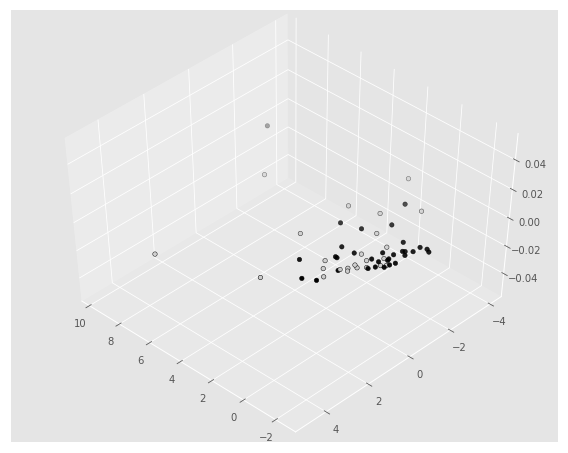

In [101]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
centers = [[1, 1], [-1, -1], [1, -1]]
X = at_decomp_selected
y = lab

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

plt.show()

#### 3.2.3. Data Reorganization

Reorganize the new labeled data.

In [102]:
train_d, test_d, train_lab, test_lab = train_test_split(at_decomp_selected, lab, test_size=0.25)

#### 3.2.4. Classification Model Building

Steps are the same with 3.1.4, so we don't explain the steps again.

Neural Network Classifier usually runs better than other two and more stable through several rounds checking. The mean_test_score is around 0.6 - 0.7 every time which is acceptable. Therefore, Neural Network Classifier is more suitable for this case.

##### 3.2.4.1. Support Vector Machines

In [103]:
parameters_svm = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 10, 100, 1000]}
grid_search = GridSearchCV(SVC(), parameters_svm, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(train_d,train_lab)
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.547619,0.016965,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}"
1,0.547619,0.016965,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}"
2,0.547619,0.016965,"{'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}"
3,0.547619,0.016965,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}"
4,0.547619,0.016965,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}"
5,0.547619,0.016965,"{'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}"
6,0.642857,0.069698,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}"
7,0.547619,0.016965,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}"
8,0.547619,0.016965,"{'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}"
9,0.619048,0.154247,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}"


             precision    recall  f1-score   support

          0       0.67      0.89      0.76         9
          1       0.50      0.20      0.29         5

avg / total       0.61      0.64      0.59        14



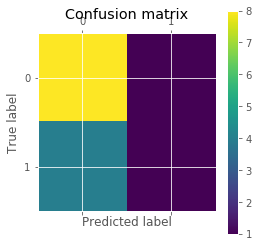

In [104]:
predictions = grid_search.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)
print (metrics.classification_report(test_lab, predictions))
# visualise the confusion matrix
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### 3.2.4.2. Random Forests

In [105]:
parameters_rf = {'n_estimators': [100, 200, 500], 'max_features': ['sqrt', 'log2', None]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, parameters_rf, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(train_d,train_lab)
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.571429,0.078857,"{'max_features': 'sqrt', 'n_estimators': 100}"
1,0.595238,0.047436,"{'max_features': 'sqrt', 'n_estimators': 200}"
2,0.642857,0.050895,"{'max_features': 'sqrt', 'n_estimators': 500}"
3,0.642857,0.106397,"{'max_features': 'log2', 'n_estimators': 100}"
4,0.642857,0.050895,"{'max_features': 'log2', 'n_estimators': 200}"
5,0.619048,0.075176,"{'max_features': 'log2', 'n_estimators': 500}"
6,0.642857,0.082108,"{'max_features': None, 'n_estimators': 100}"
7,0.619048,0.113919,"{'max_features': None, 'n_estimators': 200}"
8,0.642857,0.136552,"{'max_features': None, 'n_estimators': 500}"


             precision    recall  f1-score   support

          0       0.67      0.67      0.67         9
          1       0.40      0.40      0.40         5

avg / total       0.57      0.57      0.57        14



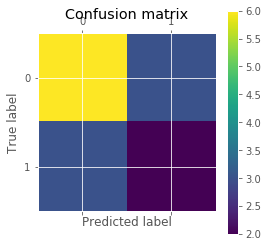

In [106]:
predictions = grid_search.predict(test_d) # predict function automatically uses the best params
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)
print (metrics.classification_report(test_lab, predictions))
# visualise the confusion matrix
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### 3.2.4.3. Neural Networks

In [107]:
parameters_mlp = {'hidden_layer_sizes': [20, 50, 100], 'activation': ['identity', 'logistic'], 'solver': ['lbfgs', 'sgd', 'adam'], 'max_iter': [10000]}
mlp = MLPClassifier()
grid_search = GridSearchCV(mlp, parameters_mlp, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(train_d,train_lab)
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.619048,0.154247,"{'activation': 'identity', 'hidden_layer_sizes..."
1,0.619048,0.039621,"{'activation': 'identity', 'hidden_layer_sizes..."
2,0.571429,0.103151,"{'activation': 'identity', 'hidden_layer_sizes..."
3,0.619048,0.154247,"{'activation': 'identity', 'hidden_layer_sizes..."
4,0.619048,0.039621,"{'activation': 'identity', 'hidden_layer_sizes..."
5,0.642857,0.125919,"{'activation': 'identity', 'hidden_layer_sizes..."
6,0.619048,0.154247,"{'activation': 'identity', 'hidden_layer_sizes..."
7,0.595238,0.070507,"{'activation': 'identity', 'hidden_layer_sizes..."
8,0.595238,0.070507,"{'activation': 'identity', 'hidden_layer_sizes..."
9,0.619048,0.135719,"{'activation': 'logistic', 'hidden_layer_sizes..."


             precision    recall  f1-score   support

          0       0.62      0.56      0.59         9
          1       0.33      0.40      0.36         5

avg / total       0.52      0.50      0.51        14



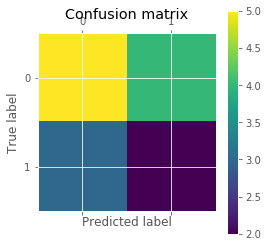

In [108]:
predictions = grid_search.predict(test_d) # predict function automatically uses the best params
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)
print (metrics.classification_report(test_lab, predictions))
# visualise the confusion matrix
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 4. Conclusion

Through this project, we understand more deeply on the American National Parks' biodiversity and the visits situation. We realize that the number of visits are influenced by many attributes. The biodiversity is only one of them, and as a result, the prediction results based on it merely may be inaccurate. Many other attributes such as the geology (the colourful badlands may be as attactive as forests for many visitors), the convenience of transportation, the perfection of tourism facilities and so on, may also contribute to the increasing of visits. In the future, we can try to build a attraction index which includes all the factors above to create a more precise prediction model.

Meanwhile, we discover that some trendecies can be predicted even if the data is not comprehensive. For examples:  
(1). Where there are many different kinds of plants, the amount of animal categories there won't be small.  
(2). Though it's uncertain that whether a national park with high species count is attractive to many visitors, a park with few species usually won't be magnetic to many visitors.  
(3). Whether a national park's annual visits is more than 100 thousand is difficult to distinguish based on the species count, but whether it can have visitors more than 800 thousand can be forecast more precisely.  
All these show that though current data opening and management situations are not perfect, we can still find many interesting things based on existing data. We can foresee that in the future, the data analysis will be more and more useful.